In [4]:
if (!"igraph" %in% installed.packages()) install.packages("igraph")
# this 'library' function loads the package in quotation marks
library("igraph")


Warning message:
"package 'igraph' was built under R version 3.6.3"
Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [5]:
#Loading the txt file using read.table
wildbirds_data <- read.table(file.choose(), header=FALSE)

In [6]:
head(wildbirds_data, 10)

V1,V2,V3,V4
1,2,0.01388889,1
1,3,0.04545455,1
1,4,0.03846154,1
1,5,0.04123711,1
1,6,0.03947368,1
1,7,0.04545455,1
1,8,0.02777778,1
1,9,0.02000000,1
1,10,0.03816794,1
1,11,0.01204819,1


In [7]:
#Now we read the data and interpret the first two columns (V1, V2) as an edgelist/matrix 
wildbirds_EL <- as.matrix(wildbirds_data[,1:2])
head(wildbirds_EL, 10)

V1,V2
1,2
1,3
1,4
1,5
1,6
1,7
1,8
1,9
1,10
1,11


In [8]:
#Now we create a graph from the birds_EL matrix
wildbirds_graph = graph.edgelist(wildbirds_EL, directed=FALSE)

In [9]:
wildbirds_graph

IGRAPH 6090840 U--- 202 11900 -- 
+ edges from 6090840:
 [1]  1-- 2  1-- 3  1-- 4  1-- 5  1-- 6  1-- 7  1-- 8  1-- 9  1--10  1--11
[11]  1--12  1--13  1--14  1--15  1--16  1--17  1--18  1--19  1--20  1--21
[21]  1--22  1--23  1--24  1--25  1--26  1--27  1--28  1--29  1--30  1--31
[31]  1--32  1--33  1--34  1--35  1--36  1--37  1--38  1--39  1--40  1--41
[41] 19--42 24--42 20--42 37--42 36--42 18--28  5--18 18--31  8--18 18--43
[51] 18--44 18--19 13--18 18--20 18--34 18--21 18--36 18--24 16--18 18--45
[61] 18--37 18--32 18--38 18--46 47--48 47--49  2--50 50--51  4--50  6--50
[71] 50--52 27--50 33--50 11--50 49--50 14--50 15--50 50--53 17--50 50--54
[81] 50--55 50--56 50--57 50--58 22--50  7--50 25--50 50--59 10--50 50--60
+ ... omitted several edges

In [202]:
summary(wildbirds_graph)

IGRAPH 6090840 U--- 202 11900 -- 
+ attr: Day (e/n), Halfweight_Index (e/n)


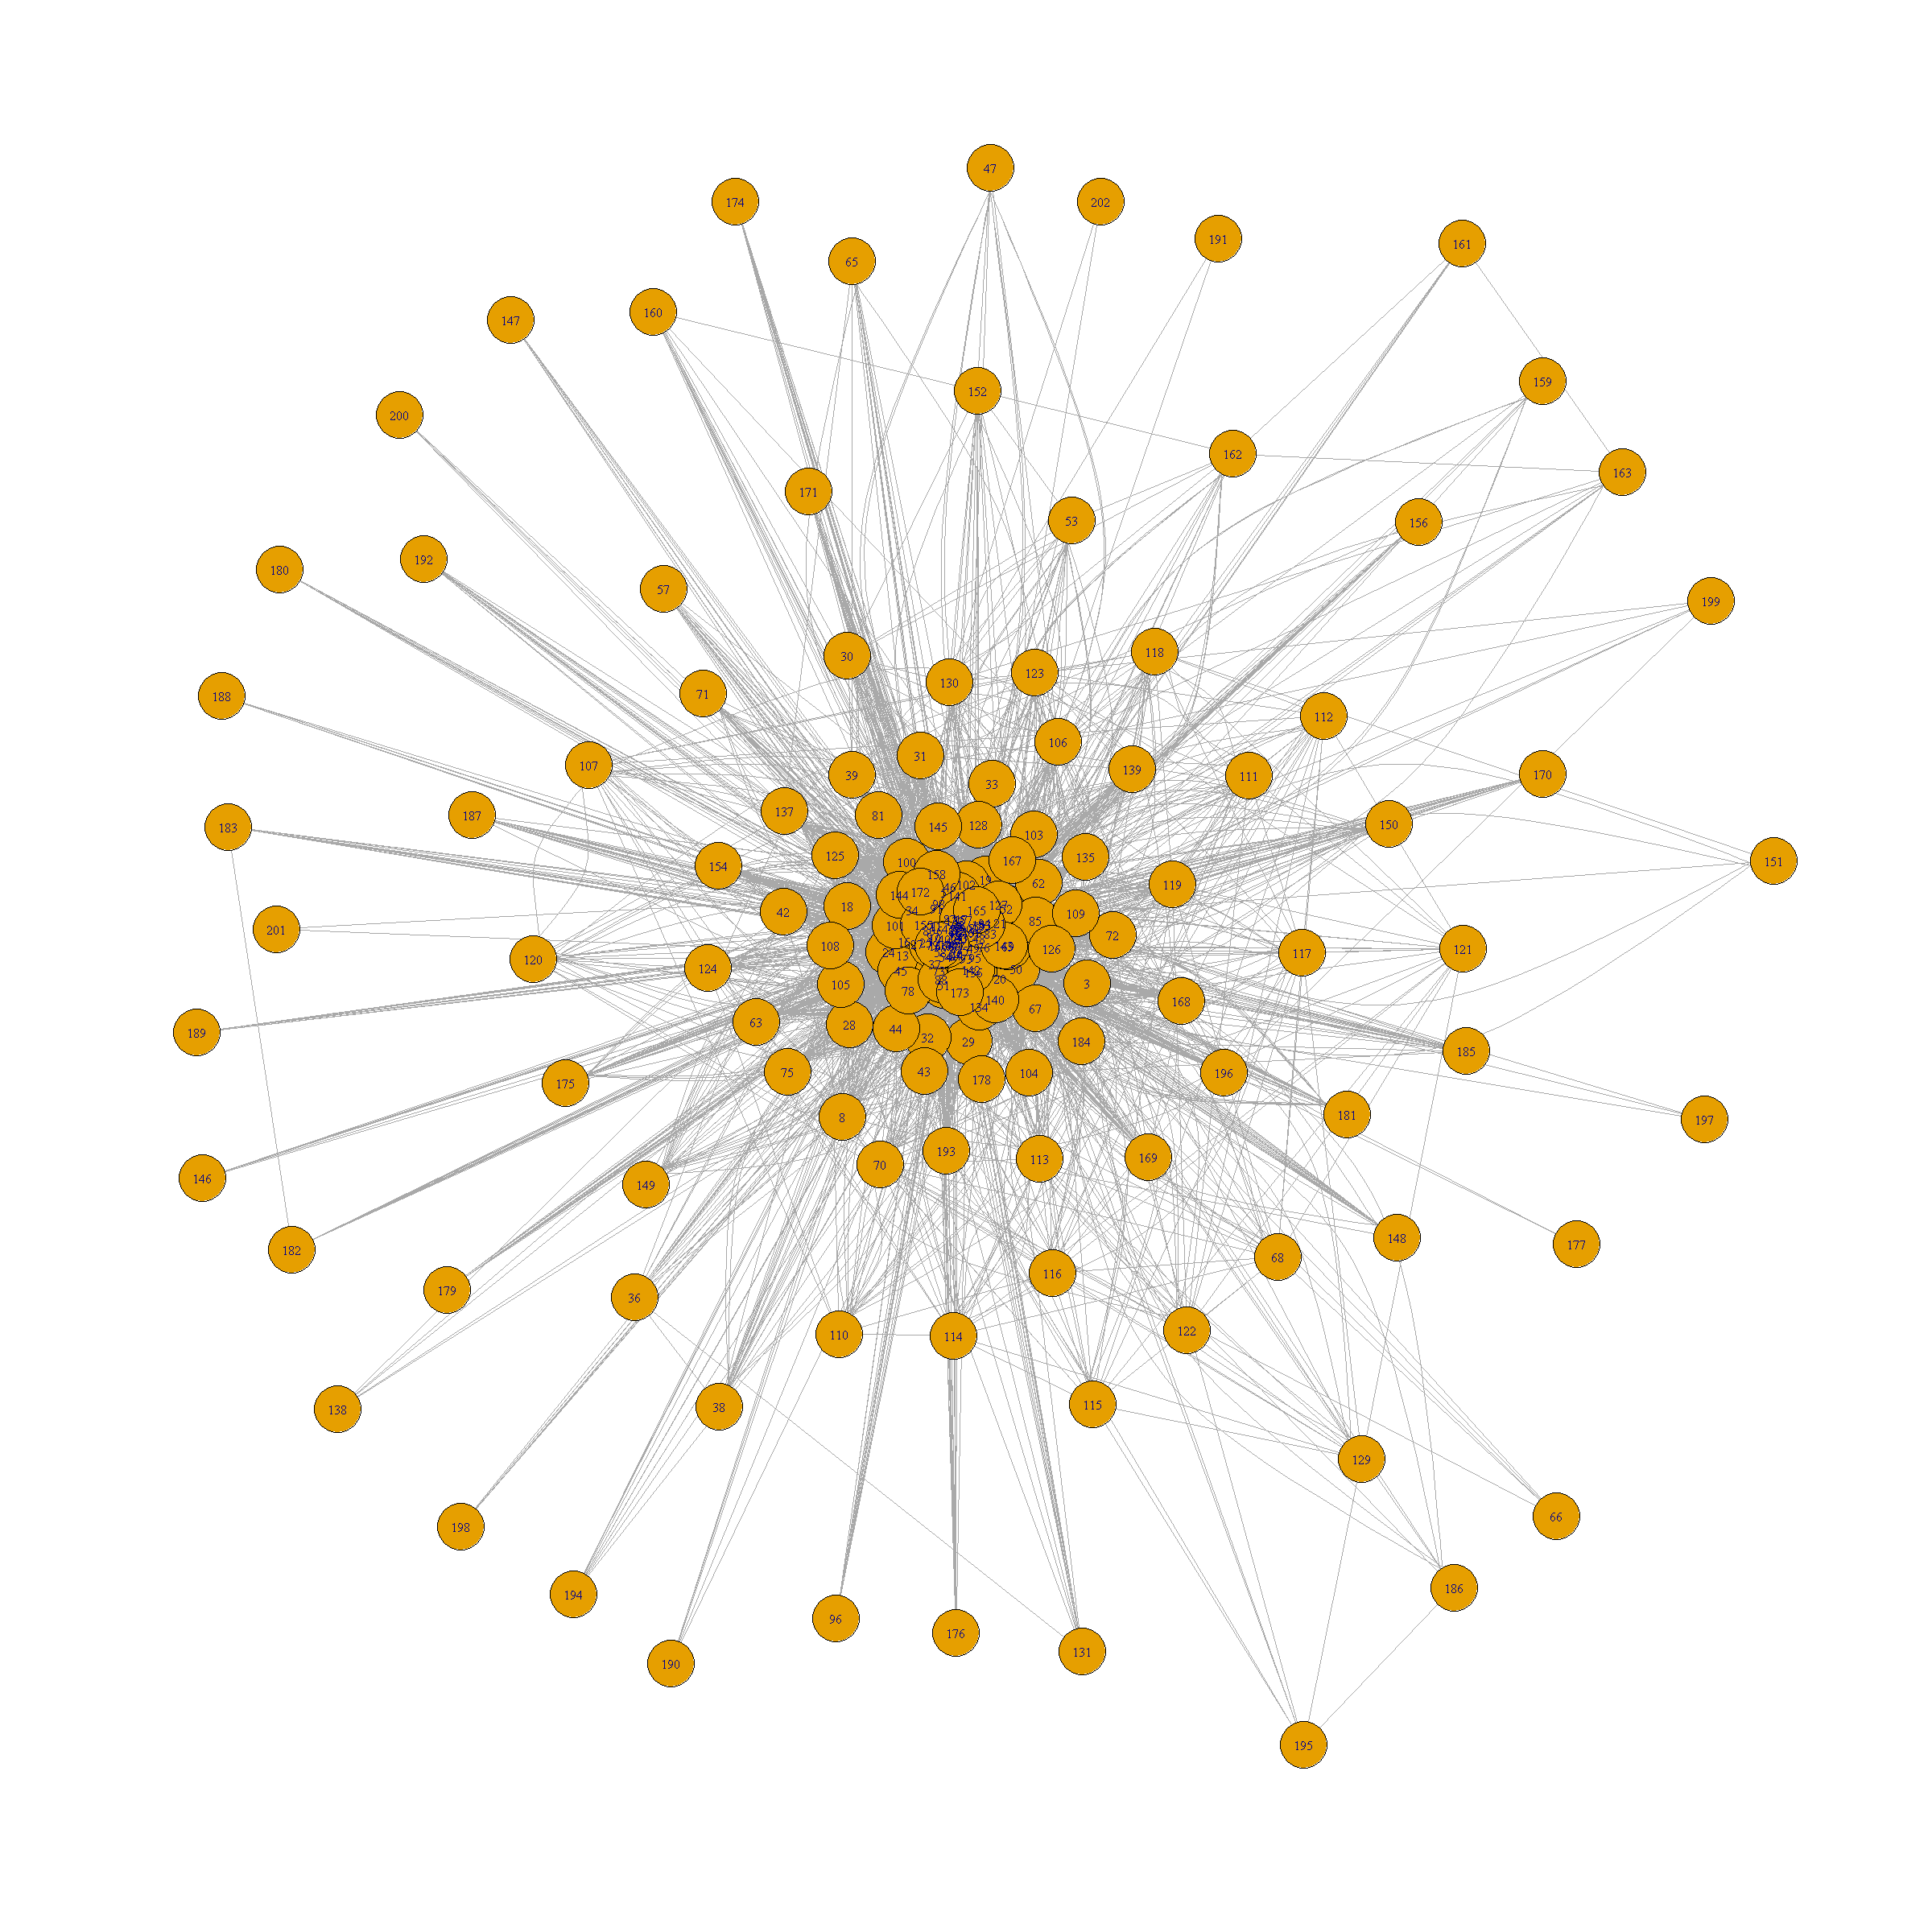

In [194]:
#Plotting the whole birds network of 6 days
plot.igraph(wildbirds_graph, layout = layout_with_gem, vertex.label.cex=0.8, vertex.size=6)

In [210]:
print(paste("The highest degree of a vertex of the whole graph is : ", max(degree(wildbirds_graph))))
print(paste("The lowest degree of a vertex of the whole graph is: ", min(degree(wildbirds_graph))))
print(paste("The average vertex degree of the whole graph is: ", mean(degree(wildbirds_graph))))


print(paste("the bird with the highest degree in the whole graph is: ", V(wildbirds_graph)[degree(wildbirds_graph) == max(degree(wildbirds_graph))]))
print(paste("the bird with the lowest degree in the whole graph is: ", V(wildbirds_graph)[degree(wildbirds_graph) == min(degree(wildbirds_graph))]))

[1] "The highest degree of a vertex of the whole graph is :  397"
[1] "The lowest degree of a vertex of the whole graph is:  2"
[1] "The average vertex degree of the whole graph is:  117.821782178218"
[1] "the bird with the highest degree in the whole graph is:  6"
[1] "the bird with the lowest degree in the whole graph is:  177"
[2] "the bird with the lowest degree in the whole graph is:  191"
[3] "the bird with the lowest degree in the whole graph is:  201"
[4] "the bird with the lowest degree in the whole graph is:  202"


In [21]:
#To see how many vertices and edges the birds network have
vertices <- paste0(gorder(wildbirds_graph), " Vertices")
edges <- paste0(gsize(wildbirds_graph), " Edges")

print(vertices)
print(edges)

[1] "202 Vertices"
[1] "11900 Edges"


In [22]:
#now we set our edge attributes 
wildbirds_graph <- wildbirds_graph %>%
    set_edge_attr("Day", value = wildbirds_data[,4]) %>%
    set_edge_attr("Halfweight_Index", value = wildbirds_data[,3])


In [23]:
#Looking at the edge properties after setting our edge attributes
E(wildbirds_graph)[[1:50]]

+ 50/11900 edges from 6090840:
   tail head tid hid Day Halfweight_Index
1     1    2   1   2   1      0.013888889
2     1    3   1   3   1      0.045454545
3     1    4   1   4   1      0.038461538
4     1    5   1   5   1      0.041237113
5     1    6   1   6   1      0.039473684
6     1    7   1   7   1      0.045454545
7     1    8   1   8   1      0.027777778
8     1    9   1   9   1      0.020000000
9     1   10   1  10   1      0.038167939
10    1   11   1  11   1      0.012048193
11    1   12   1  12   1      0.017241379
12    1   13   1  13   1      0.024390244
13    1   14   1  14   1      0.052631579
14    1   15   1  15   1      0.018867925
15    1   16   1  16   1      0.055555556
16    1   17   1  17   1      0.017543860
17    1   18   1  18   1      0.033333333
18    1   19   1  19   1      0.021276596
19    1   20   1  20   1      0.006944444
20    1   21   1  21   1      0.016129032
21    1   22   1  22   1      0.058252427
22    1   23   1  23   1      0.035714286
23 

In [174]:
V(wildbirds_graph)[[1:50]]

+ 50/202 vertices, from 6090840:
 [1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
[26] 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50

In [25]:
#The average path length 
average.path.length(wildbirds_graph)

[1] 2.105118

In [26]:
transitivity(wildbirds_graph)

[1] 0.7027329

In [211]:
#Now we interpret each interaction between the birds according to the day in the week
#We will assign different edge colors for each day to recognize the relationship more
birds_graph_int <- wildbirds_graph %>% 
    set_edge_attr("color", value="black", E(wildbirds_graph)[Day==1]) %>%
    set_edge_attr("color", value="red", E(wildbirds_graph)[Day==2])%>%
    set_edge_attr("color", value="green3", E(wildbirds_graph)[Day==3])%>%
    set_edge_attr("color", value="darkblue", E(wildbirds_graph)[Day==4])%>%
    set_edge_attr("color", value="cyan", E(wildbirds_graph)[Day==5])%>%
    set_edge_attr("color", value="yellow", E(wildbirds_graph)[Day==6])


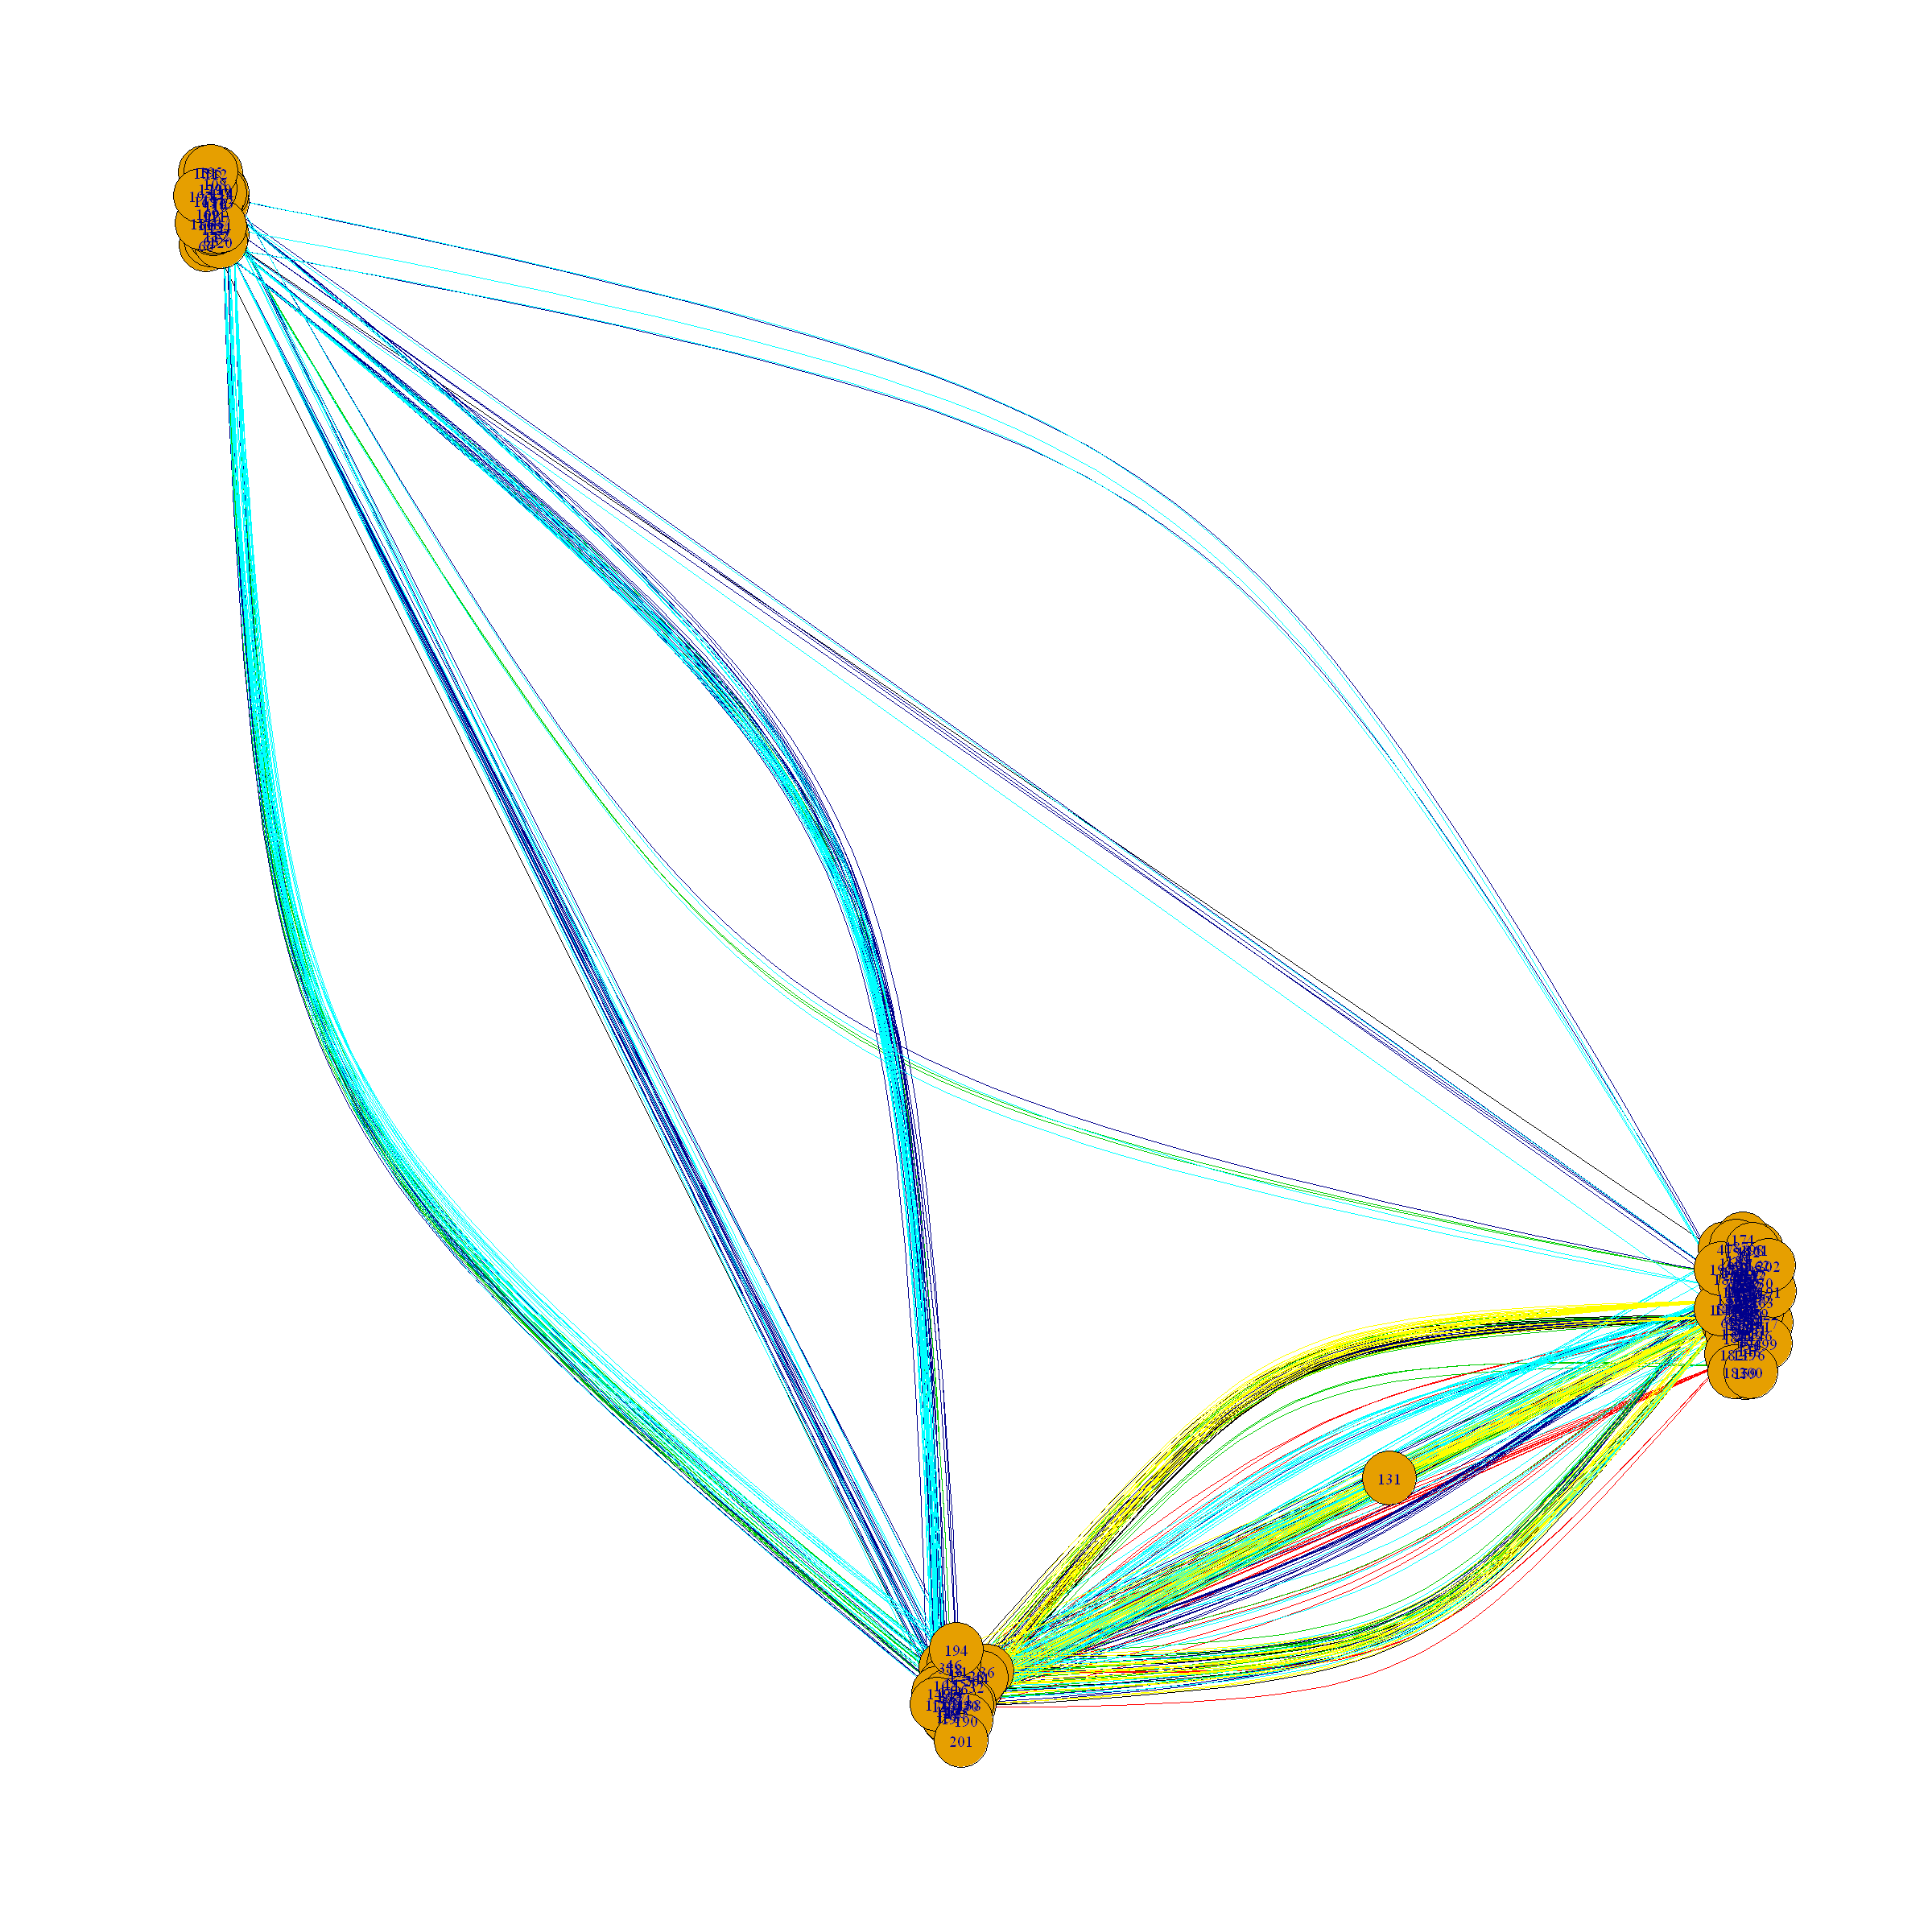

In [213]:
options(repr.plot.width=20, repr.plot.height=20)
layout <- layout_with_drl(birds_graph_int)
plot(birds_graph_int, layout=layout, edge.width= E(birds_graph_int)$Halfweight_Index, vertex.size= 7, vertex.label.size = 4)

In [216]:
print(paste("The diameter (largest shortest path) of whole graph is:", diameter(wildbirds_graph, directed = FALSE, unconnected = FALSE)))

[1] "The diameter (largest shortest path) of whole graph is: 4"


In [ ]:
## Making subset graphs for interactions on each day to further analyze our birds network. We also set edge attributes in this part. 

In [32]:
#Looking at data for each separate day 
#We make subsets of interaction between birds on each day 
Day_1 <- subset(wildbirds_data, wildbirds_data[,4] == 1)
head(Day_1, 5)

#Now we make a graph for the subset of interaction on day 1 
birdsgraph_day1 <- graph.edgelist(as.matrix(Day_1[,1:2]), directed = FALSE)
#Setting the edge attributes i.e. interaction half weight index and day
birdsgraph_day1 <- birdsgraph_day1 %>%
    set_edge_attr("Halfweight_Index", value = Day_1[,3]) %>%
    set_edge_attr("Day", value = Day_1[,4])

#Checking the number of vertices and edges for our new subset for day 1
paste0(gorder(birdsgraph_day1), " Vertices")
paste0(gsize(birdsgraph_day1), " Edges")

V1,V2,V3,V4
1,2,0.01388889,1
1,3,0.04545455,1
1,4,0.03846154,1
1,5,0.04123711,1
1,6,0.03947368,1


[1] "131 Vertices"

[1] "1444 Edges"

In [33]:
Day_2 <- subset(wildbirds_data, wildbirds_data[,4] == 2)
head(Day_2, 5)

#Similarly we make a graph for the subset of interaction on day 2
birdsgraph_day2 <- graph.edgelist(as.matrix(Day_2[,1:2]), directed = FALSE)
#Setting the edge attributes i.e. interaction half weight index and day
birdsgraph_day2 <- birdsgraph_day2 %>%
    set_edge_attr("Halfweight_Index", value = Day_2[,3]) %>%
    set_edge_attr("Day", value = Day_2[,4])

#Checking the number of vertices and edges for our new subset for day 2
paste0(gorder(birdsgraph_day2), " Vertices")
paste0(gsize(birdsgraph_day2), " Edges")

,V1,V2,V3,V4
1445,132,6,0.01433692,2
1446,132,27,0.01851852,2
1447,132,9,0.01000000,2
1448,132,74,0.02380952,2
1449,132,11,0.01204819,2


[1] "152 Vertices"

[1] "1483 Edges"

In [34]:
Day_3 <- subset(wildbirds_data, wildbirds_data[,4] == 3)
head(Day_3, 5)

#Similarly we make a graph for the subset of interaction on day 2
birdsgraph_day3 <- graph.edgelist(as.matrix(Day_3[,1:2]), directed = FALSE)
#Setting the edge attributes i.e. interaction half weight index and day
birdsgraph_day3 <- birdsgraph_day3 %>%
    set_edge_attr("Halfweight_Index", value = Day_3[,3]) %>%
    set_edge_attr("Day", value = Day_3[,4])

#Checking the number of vertices and edges for our new subset for day 3
paste0(gorder(birdsgraph_day3), " Vertices")
paste0(gsize(birdsgraph_day3), " Edges")

,V1,V2,V3,V4
2928,132,73,0.030303030,3
2929,132,74,0.008403361,3
2930,132,11,0.044776119,3
2931,132,12,0.054545455,3
2932,132,99,0.044444444,3


[1] "169 Vertices"

[1] "1615 Edges"

In [35]:
Day_4 <- subset(wildbirds_data, wildbirds_data[,4] == 4)
head(Day_4, 5)

#Similarly we make a graph for the subset of interaction on day 2
birdsgraph_day4 <- graph.edgelist(as.matrix(Day_4[,1:2]), directed = FALSE)
#Setting the edge attributes i.e. interaction half weight index and day
birdsgraph_day4 <- birdsgraph_day4 %>%
    set_edge_attr("Halfweight_Index", value = Day_4[,3]) %>%
    set_edge_attr("Day", value = Day_4[,4])

#Checking the number of vertices and edges for our new subset for day 4
paste0(gorder(birdsgraph_day4), " Vertices")
paste0(gsize(birdsgraph_day4), " Edges")

,V1,V2,V3,V4
4543,132,1,0.008403361,4
4544,132,2,0.020161290,4
4545,132,170,0.009615385,4
4546,132,73,0.017857143,4
4547,132,7,0.023148148,4


[1] "181 Vertices"

[1] "2009 Edges"

In [36]:
Day_5 <- subset(wildbirds_data, wildbirds_data[,4] == 5)
head(Day_5, 5)

#Similarly we make a graph for the subset of interaction on day 2
birdsgraph_day5 <- graph.edgelist(as.matrix(Day_5[,1:2]), directed = FALSE)
#Setting the edge attributes i.e. interaction half weight index and day
birdsgraph_day5 <- birdsgraph_day5 %>%
    set_edge_attr("Halfweight_Index", value = Day_5[,3]) %>%
    set_edge_attr("Day", value = Day_5[,4])

#Checking the number of vertices and edges for our new subset for day 5
paste0(gorder(birdsgraph_day5), " Vertices")
paste0(gsize(birdsgraph_day5), " Edges")


,V1,V2,V3,V4
6552,132,73,0.008196721,5
6553,132,7,0.004098361,5
6554,132,104,0.009009009,5
6555,132,11,0.134693878,5
6556,132,12,0.128027682,5


[1] "191 Vertices"

[1] "2512 Edges"

In [37]:
Day_6 <- subset(wildbirds_data, wildbirds_data[,4] == 6)
head(Day_6, 5)

#Similarly we make a graph for the subset of interaction on day 2
birdsgraph_day6 <- graph.edgelist(as.matrix(Day_6[,1:2]), directed = FALSE)
#Setting the edge attributes i.e. interaction half weight index and day
birdsgraph_day6 <- birdsgraph_day6 %>%
    set_edge_attr("Halfweight_Index", value = Day_6[,3]) %>%
    set_edge_attr("Day", value = Day_6[,4])

#Checking the number of vertices and edges for our new subset for day 7
paste0(gorder(birdsgraph_day6), " Vertices")
paste0(gsize(birdsgraph_day6), " Edges")

,V1,V2,V3,V4
9064,132,3,0.01052632,6
9065,132,192,0.01086957,6
9066,132,73,0.08196721,6
9067,132,27,0.03703704,6
9068,132,9,0.01234568,6


[1] "202 Vertices"

[1] "2837 Edges"

### Now we will calculate the mean half weight for each day. The reason for doing this is because when we plot the graphs representing the interactions between birds on different days, we will put the edge colors according to the weightage. 

In [38]:
#Now we calculate the average edge weight value for each day
mean_bird1 <- mean(E(birdsgraph_day1)$Halfweight_Index)
mean_bird1

[1] 0.07861439

In [39]:
mean_bird2 <- mean(E(birdsgraph_day2)$Halfweight_Index)
mean_bird2

[1] 0.06264319

In [40]:
mean_bird3 <- mean(E(birdsgraph_day3)$Halfweight_Index)
mean_bird3

[1] 0.06802637

In [41]:
mean_bird4 <- mean(E(birdsgraph_day4)$Halfweight_Index)
mean_bird4

[1] 0.06277241

In [42]:
mean_bird5 <- mean(E(birdsgraph_day5)$Halfweight_Index)
mean_bird5

[1] 0.0629986

In [43]:
mean_bird6 <- mean(E(birdsgraph_day6)$Halfweight_Index)
mean_bird6

[1] 0.06562003

## Plotting and calculating graph metrics for birds interaction on day 1

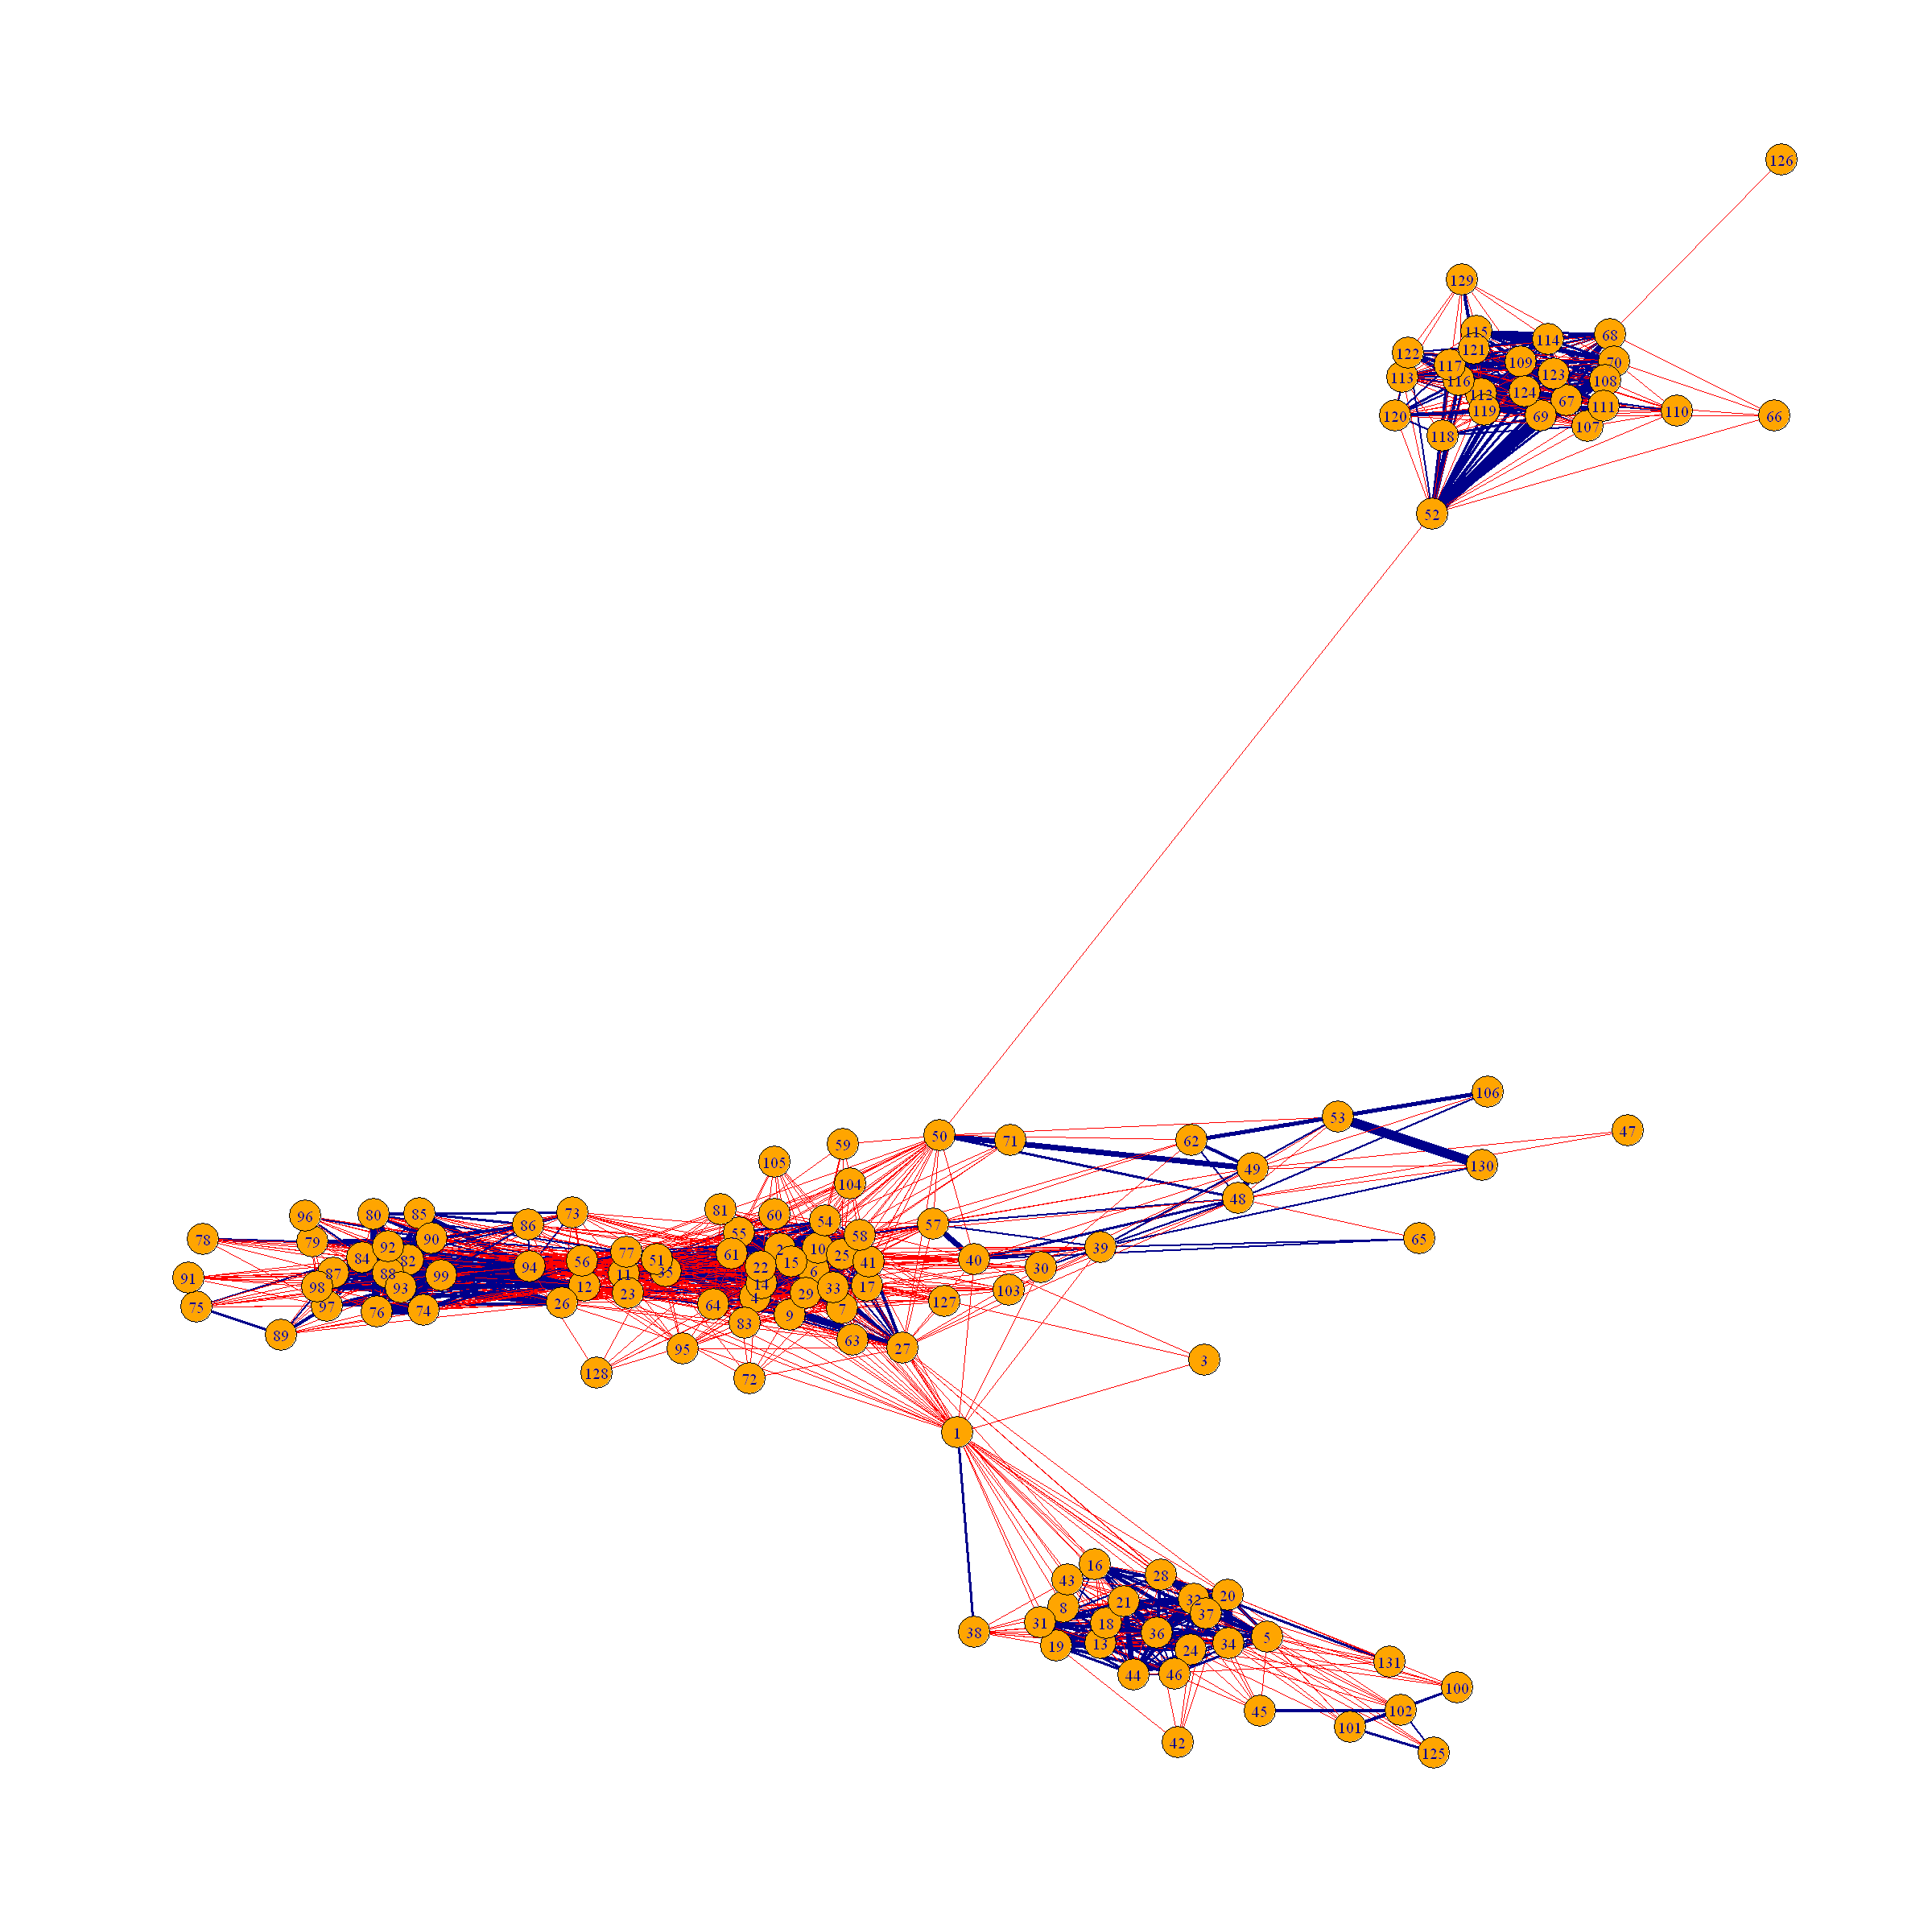

In [182]:
#Now we set the edge attributes of birds that interacted on day 1
#Color coding the edges so that according to the halfweight index, we can see which birds interacted the most and least 
birdsgraph_day1 <- birdsgraph_day1 %>%
    set_edge_attr("color", value = 'darkblue', E(birdsgraph_day1)[Halfweight_Index > mean_bird1])%>%
    set_edge_attr("color", value = 'darkgreen', E(birdsgraph_day1)[Halfweight_Index == mean_bird1])%>%
    set_edge_attr("color", value = 'red', E(birdsgraph_day1)[Halfweight_Index < mean_bird1])

#Plotting the netword for day 1
options(repr.plot.height = 20, repr.plot.width = 20)
plot(birdsgraph_day1, layout=layout_with_fr, vertex.size= 4, vertex.label.size = 4, vertex.color = "orange", edge.width = E(birdsgraph_day1)$Halfweight_Index*20)


In [203]:
#Summarize the graph
summary(birdsgraph_day1)

IGRAPH 5b3746f U--- 131 1444 -- 
+ attr: Halfweight_Index (e/n), Day (e/n), color (e/c)


##### The number of connected components of day 1 graph is 1, which means the graph is fully connected

In [121]:
#checking number of connected components in day 1 network
ConnectedComp <- components(birdsgraph_day1)
ConnectedComp$no

[1] 1

In [204]:
#The number of vertices and edges
print(paste0("the number of vertices in day 1 graph are:", gorder(birdsgraph_day1)))
print(paste0("the number of edges in day 1 graph are:", gsize(birdsgraph_day1)))

#Calculating the average path length of birds on day 1 graph
print(paste("The average path length of birds interaction on day 1 is: ", average.path.length(birdsgraph_day1)))

#Calculating the max, min, and average degree
print(paste("The vertex with the maximum degree on day 1 is: ", max(degree(birdsgraph_day1))))
print(paste("The vertex with the minimum degree on day 1 is: ", min(degree(birdsgraph_day1))))
print(paste("The average vertex degree on day 1 is: ", mean(degree(birdsgraph_day1))))

#Finding the bird which has the max and min degree on day 1 
print(paste("The bird with the highest degree on day 1 is: ", V(birdsgraph_day1)[degree(birdsgraph_day1) == max(degree(birdsgraph_day1))]))
print(paste("The bird with the lowest degree on day 1 is: ", V(birdsgraph_day1)[degree(birdsgraph_day1) == min(degree(birdsgraph_day1))]))



#Closeness centrality
print(paste("the closeness centrality of most interactive bird number 56 on day 1 is ", closeness(birdsgraph_day1, '56')))
print(paste("the closeness centrality of least interactive bird number 126 on day 1 is ", closeness(birdsgraph_day1, '126')))

#Calculating the betweenness centrality of birds with max and min degree
print(paste("the betweenness centrality of most interactive bird number 56 on day 1 is ", betweenness(birdsgraph_day1, '56')))
print(paste("the betweenness centrality of least interactive bird number 56 on day 1 is ",betweenness(birdsgraph_day1, '126')))

#Finding the neighbors of vertex with highest and lowest degree
neighbors(birdsgraph_day1, '56', mode = c("out", "in", "all", "total"))
neighbors(birdsgraph_day1, '126', mode = c("out", "in", "all", "total"))

#clustering coeff
print(paste("The clustering coefficient of day 1 graph is: ", transitivity(birdsgraph_day1)))
print(paste("The average clustering coefficient of day 1 graph is: ", transitivity(birdsgraph_day1, type = "average")))

print(paste("The diameter (largest shortest path) of day 1 graph is:", diameter(birdsgraph_day1, directed = FALSE, unconnected = FALSE)))

[1] "the number of vertices in day 1 graph are:131"
[1] "the number of edges in day 1 graph are:1444"
[1] "The average path length of birds interaction on day 1 is:  2.7332941867293"
[1] "The vertex with the maximum degree on day 1 is:  57"
[1] "The vertex with the minimum degree on day 1 is:  1"
[1] "The average vertex degree on day 1 is:  22.0458015267176"
[1] "The bird with the highest degree on day 1 is:  56"
[1] "The bird with the lowest degree on day 1 is:  126"
[1] "the closeness centrality of most interactive bird number 56 on day 1 is  0.00393700787401575"
[1] "the closeness centrality of least interactive bird number 126 on day 1 is  0.00175746924428822"
[1] "the betweenness centrality of most interactive bird number 56 on day 1 is  496.492150949529"
[1] "the betweenness centrality of least interactive bird number 56 on day 1 is  0"


+ 57/131 vertices, from 5b3746f:
 [1]  2  4  6  7  9 10 11 12 14 15 17 22 23 25 26 27 29 33 35 40 41 50 51 54 55
[26] 57 58 60 61 64 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92
[51] 93 94 95 96 97 98 99

+ 1/131 vertex, from 5b3746f:
[1] 68

[1] "The clustering coefficient of day 1 graph is:  0.685667792598437"
[1] "The average clustering coefficient of day 1 graph is:  0.80923202188385"
[1] "The diameter (largest shortest path) of day 1 graph is: 6"


## Plotting and calculating graph metrics for birds interaction on day 2


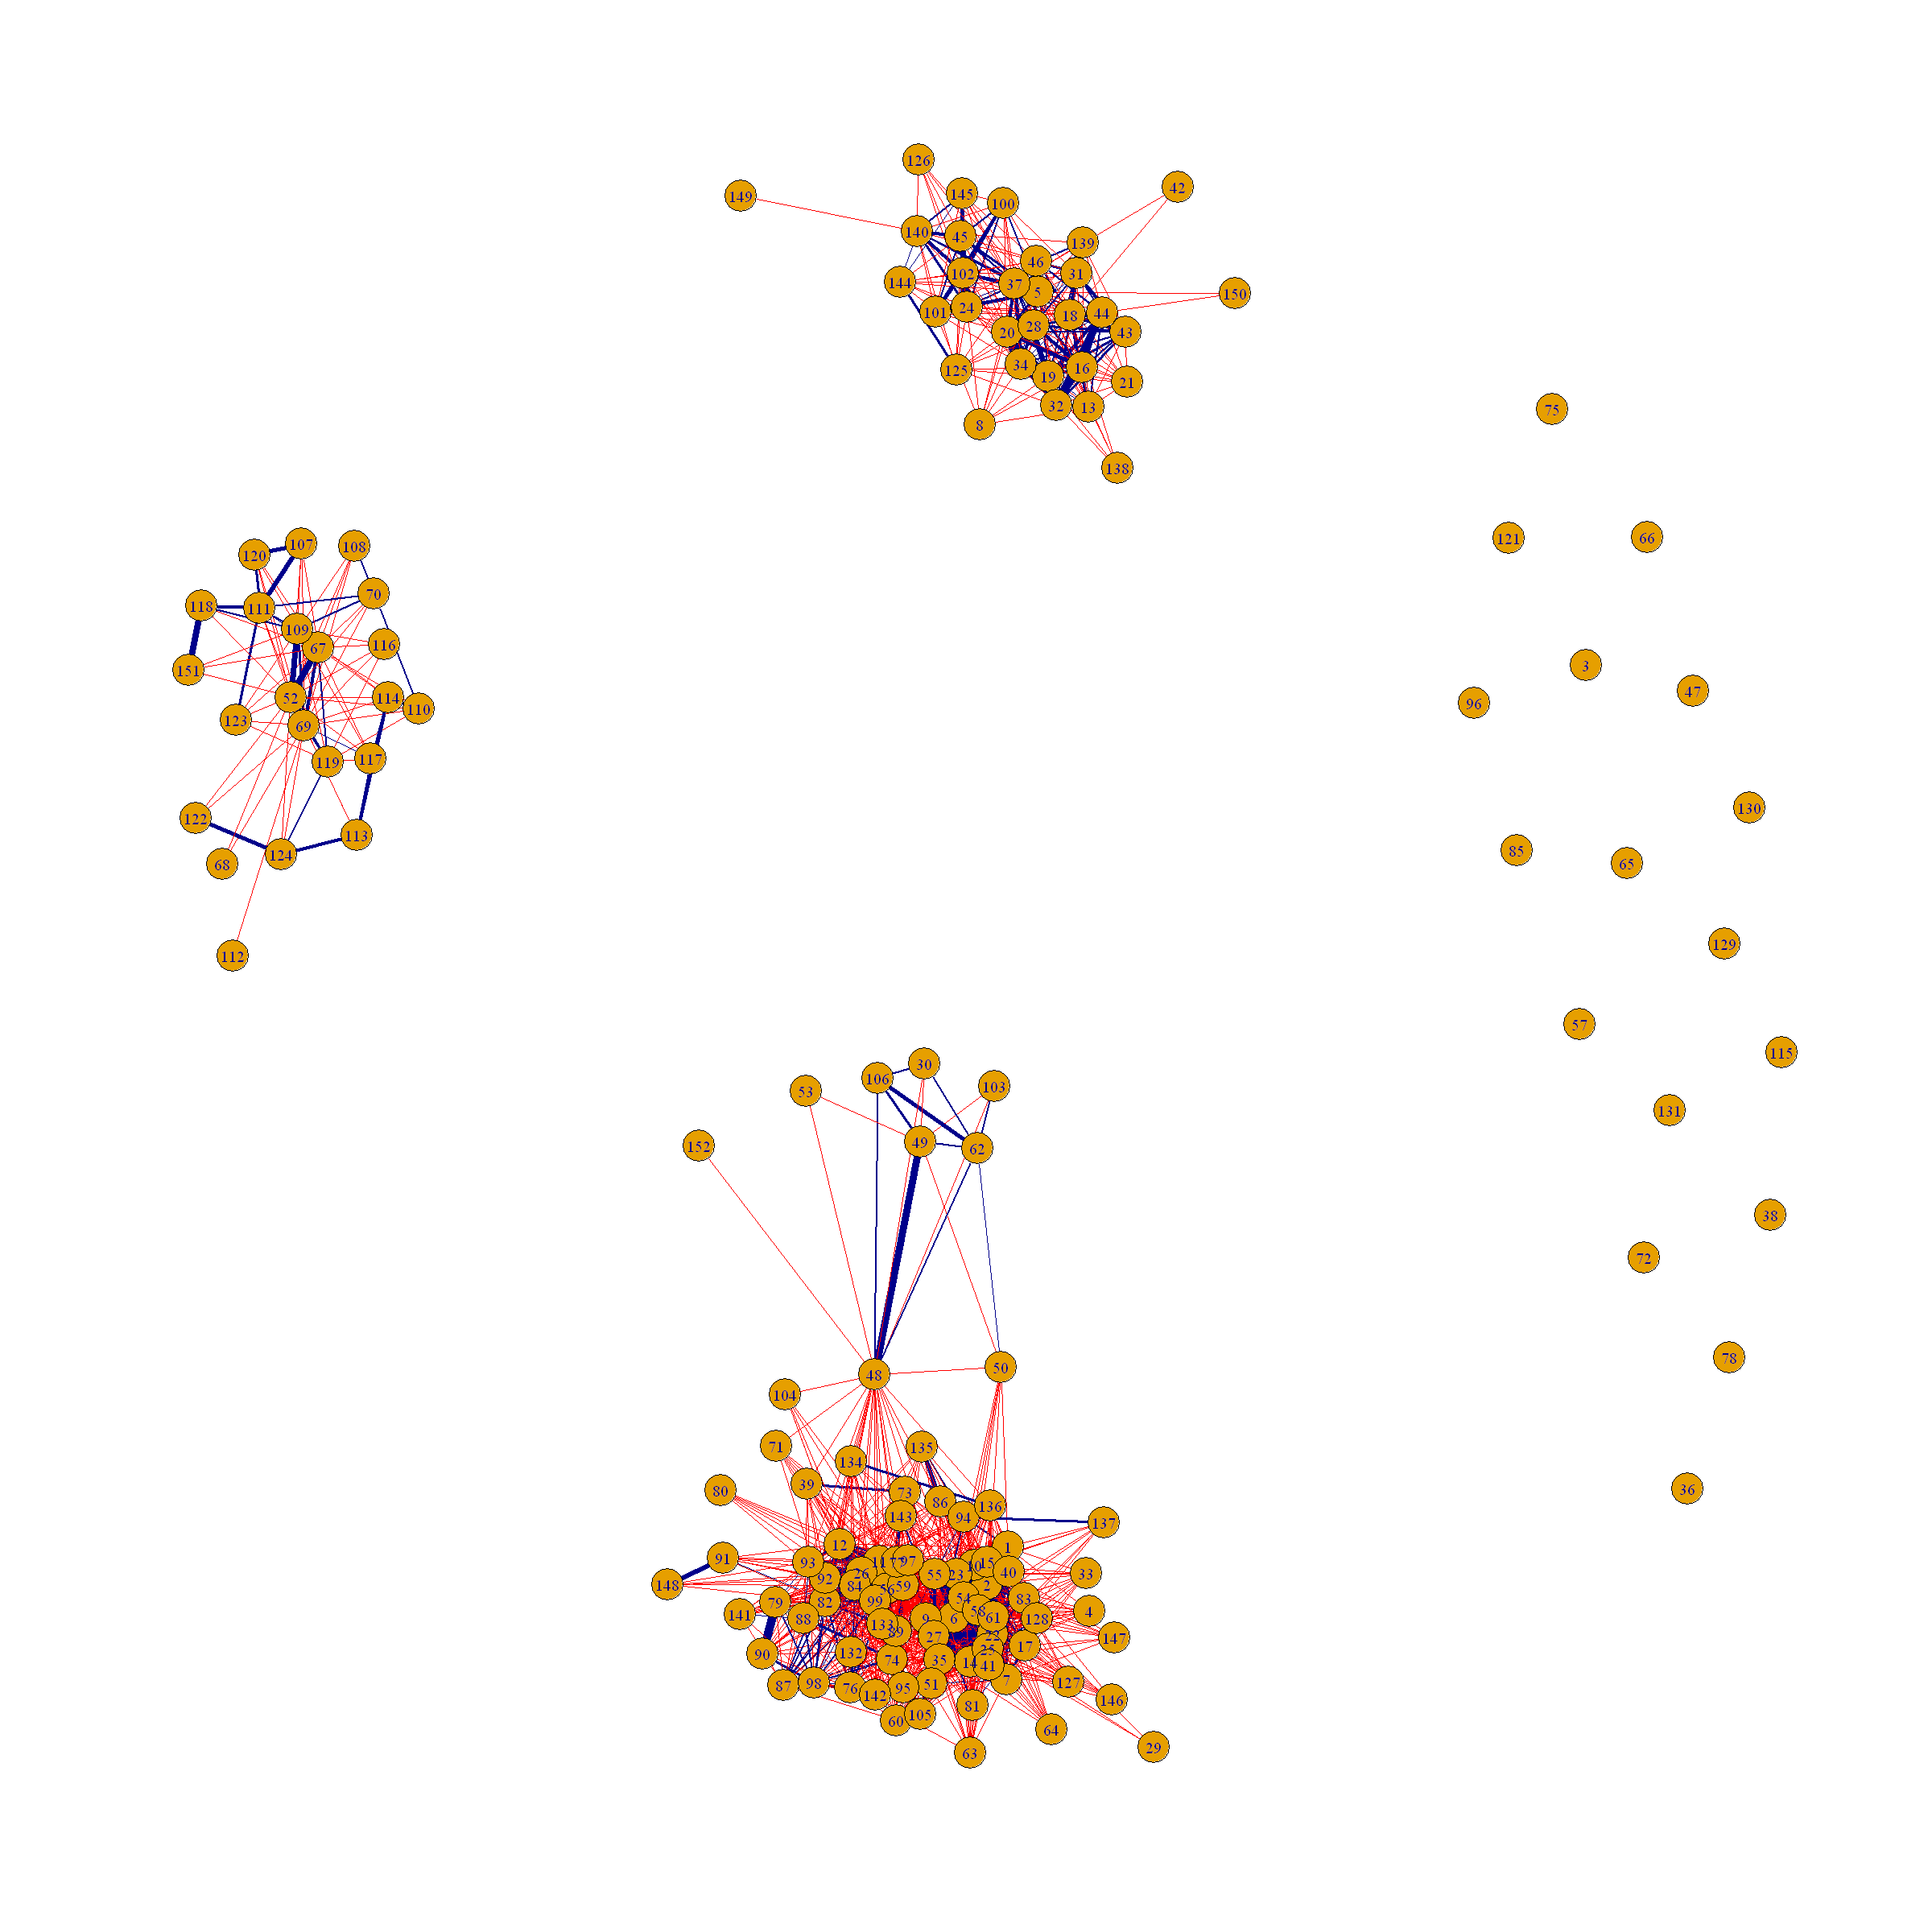

In [183]:
#Now we set the edge attributes of birds that interacted on day 2
#Color coding the edges so that according to the halfweight index, we can see which birds interacted the most and least 
birdsgraph_day2 <- birdsgraph_day2 %>%
    set_edge_attr("color", value = 'darkblue', E(birdsgraph_day2)[Halfweight_Index > mean_bird2])%>%
    set_edge_attr("color", value = 'darkgreen', E(birdsgraph_day2)[Halfweight_Index == mean_bird2])%>%
    set_edge_attr("color", value = 'red', E(birdsgraph_day2)[Halfweight_Index < mean_bird2])

#Plotting the netword for day 1
options(repr.plot.height = 20, repr.plot.width = 20)
plot(birdsgraph_day2, layout=layout_with_fr, vertex.size= 4, vertex.label.size = 4, edge.width = E(birdsgraph_day2)$Halfweight_Index*20)



##### The number of connected components of day 2 graph is 20, which means the graph is disconnected

In [175]:
#checking number of connected components in day 2 network
ConnectedComp <- components(birdsgraph_day2)
ConnectedComp$no

[1] 20

In [205]:
#The number of vertices and edges
print(paste0("the number of vertices in day 2 graph are:", gorder(birdsgraph_day2)))
print(paste0("the number of edges in day 2 graph are:", gsize(birdsgraph_day2)))

#Calculating the average path length of birds on day 2 graph
print(paste("The average path length of birds interaction on day 2 is: ", average.path.length(birdsgraph_day2)))

#Calculating the max, min, and average degree
print(paste("The vertex with the maximum degree on day 2 is: ", max(degree(birdsgraph_day2))))
print(paste("The vertex with the minimum degree on day 2 is: ", min(degree(birdsgraph_day2))))
print(paste("The average vertex degree on day 2 is: ", mean(degree(birdsgraph_day2))))

#Finding the bird which has the max degree on day 2 
#Since the graph is disconnected for day 2, we have multiple vertices for lowest degree 
print(paste("The bird with the highest degree on day 2 is: ", V(birdsgraph_day2)[degree(birdsgraph_day2) == max(degree(birdsgraph_day2))]))


#Closeness centrality
print(paste("the closeness centrality of most interactive bird number 6 on day 2 is ", closeness(birdsgraph_day2, "6")))

#Calculating the betweenness centrality of birds with max and min degree
print(paste("the betweenness centrality of most interactive bird number 6 on day 2 is ", betweenness(birdsgraph_day2, "6")))

#Finding the neighbors of vertex with highest and lowest degree
neighbors(birdsgraph_day2, '6', mode = c("out", "in", "all", "total"))

#clustering coeff
print(paste("The clustering coefficient of day 2 graph is: ", transitivity(birdsgraph_day2)))
print(paste("The average clustering coefficient of day 2 graph is: ", transitivity(birdsgraph_day2, type = "average")))

print(paste("The diameter (largest shortest path) of day 2 graph is:", diameter(birdsgraph_day2, directed = FALSE, unconnected = TRUE)))

[1] "the number of vertices in day 2 graph are:152"
[1] "the number of edges in day 2 graph are:1483"
[1] "The average path length of birds interaction on day 2 is:  1.74159820761763"
[1] "The vertex with the maximum degree on day 2 is:  62"
[1] "The vertex with the minimum degree on day 2 is:  0"
[1] "The average vertex degree on day 2 is:  19.5131578947368"
[1] "The bird with the highest degree on day 2 is:  6"


Warning message in closeness(birdsgraph_day2, "6"):
"At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs"

[1] "the closeness centrality of most interactive bird number 6 on day 2 is  9.30665425779432e-05"
[1] "the betweenness centrality of most interactive bird number 6 on day 2 is  169.392003183712"


+ 62/152 vertices, from 5c3aa88:
 [1]   1   2   4   7   9  10  11  12  14  15  17  22  23  25  26  27  29  33  35
[20]  40  41  50  51  54  55  56  58  59  61  63  64  73  74  76  77  79  81  82
[39]  83  84  86  89  90  92  93  94  95  97  98  99 105 127 128 132 133 135 136
[58] 137 142 143 146 147

[1] "The clustering coefficient of day 2 graph is:  0.643373493975904"
[1] "The average clustering coefficient of day 2 graph is:  0.770749138925286"
[1] "The diameter (largest shortest path) of day 2 graph is: 3"


## Plotting and calculating graph metrics for birds interaction on day 3


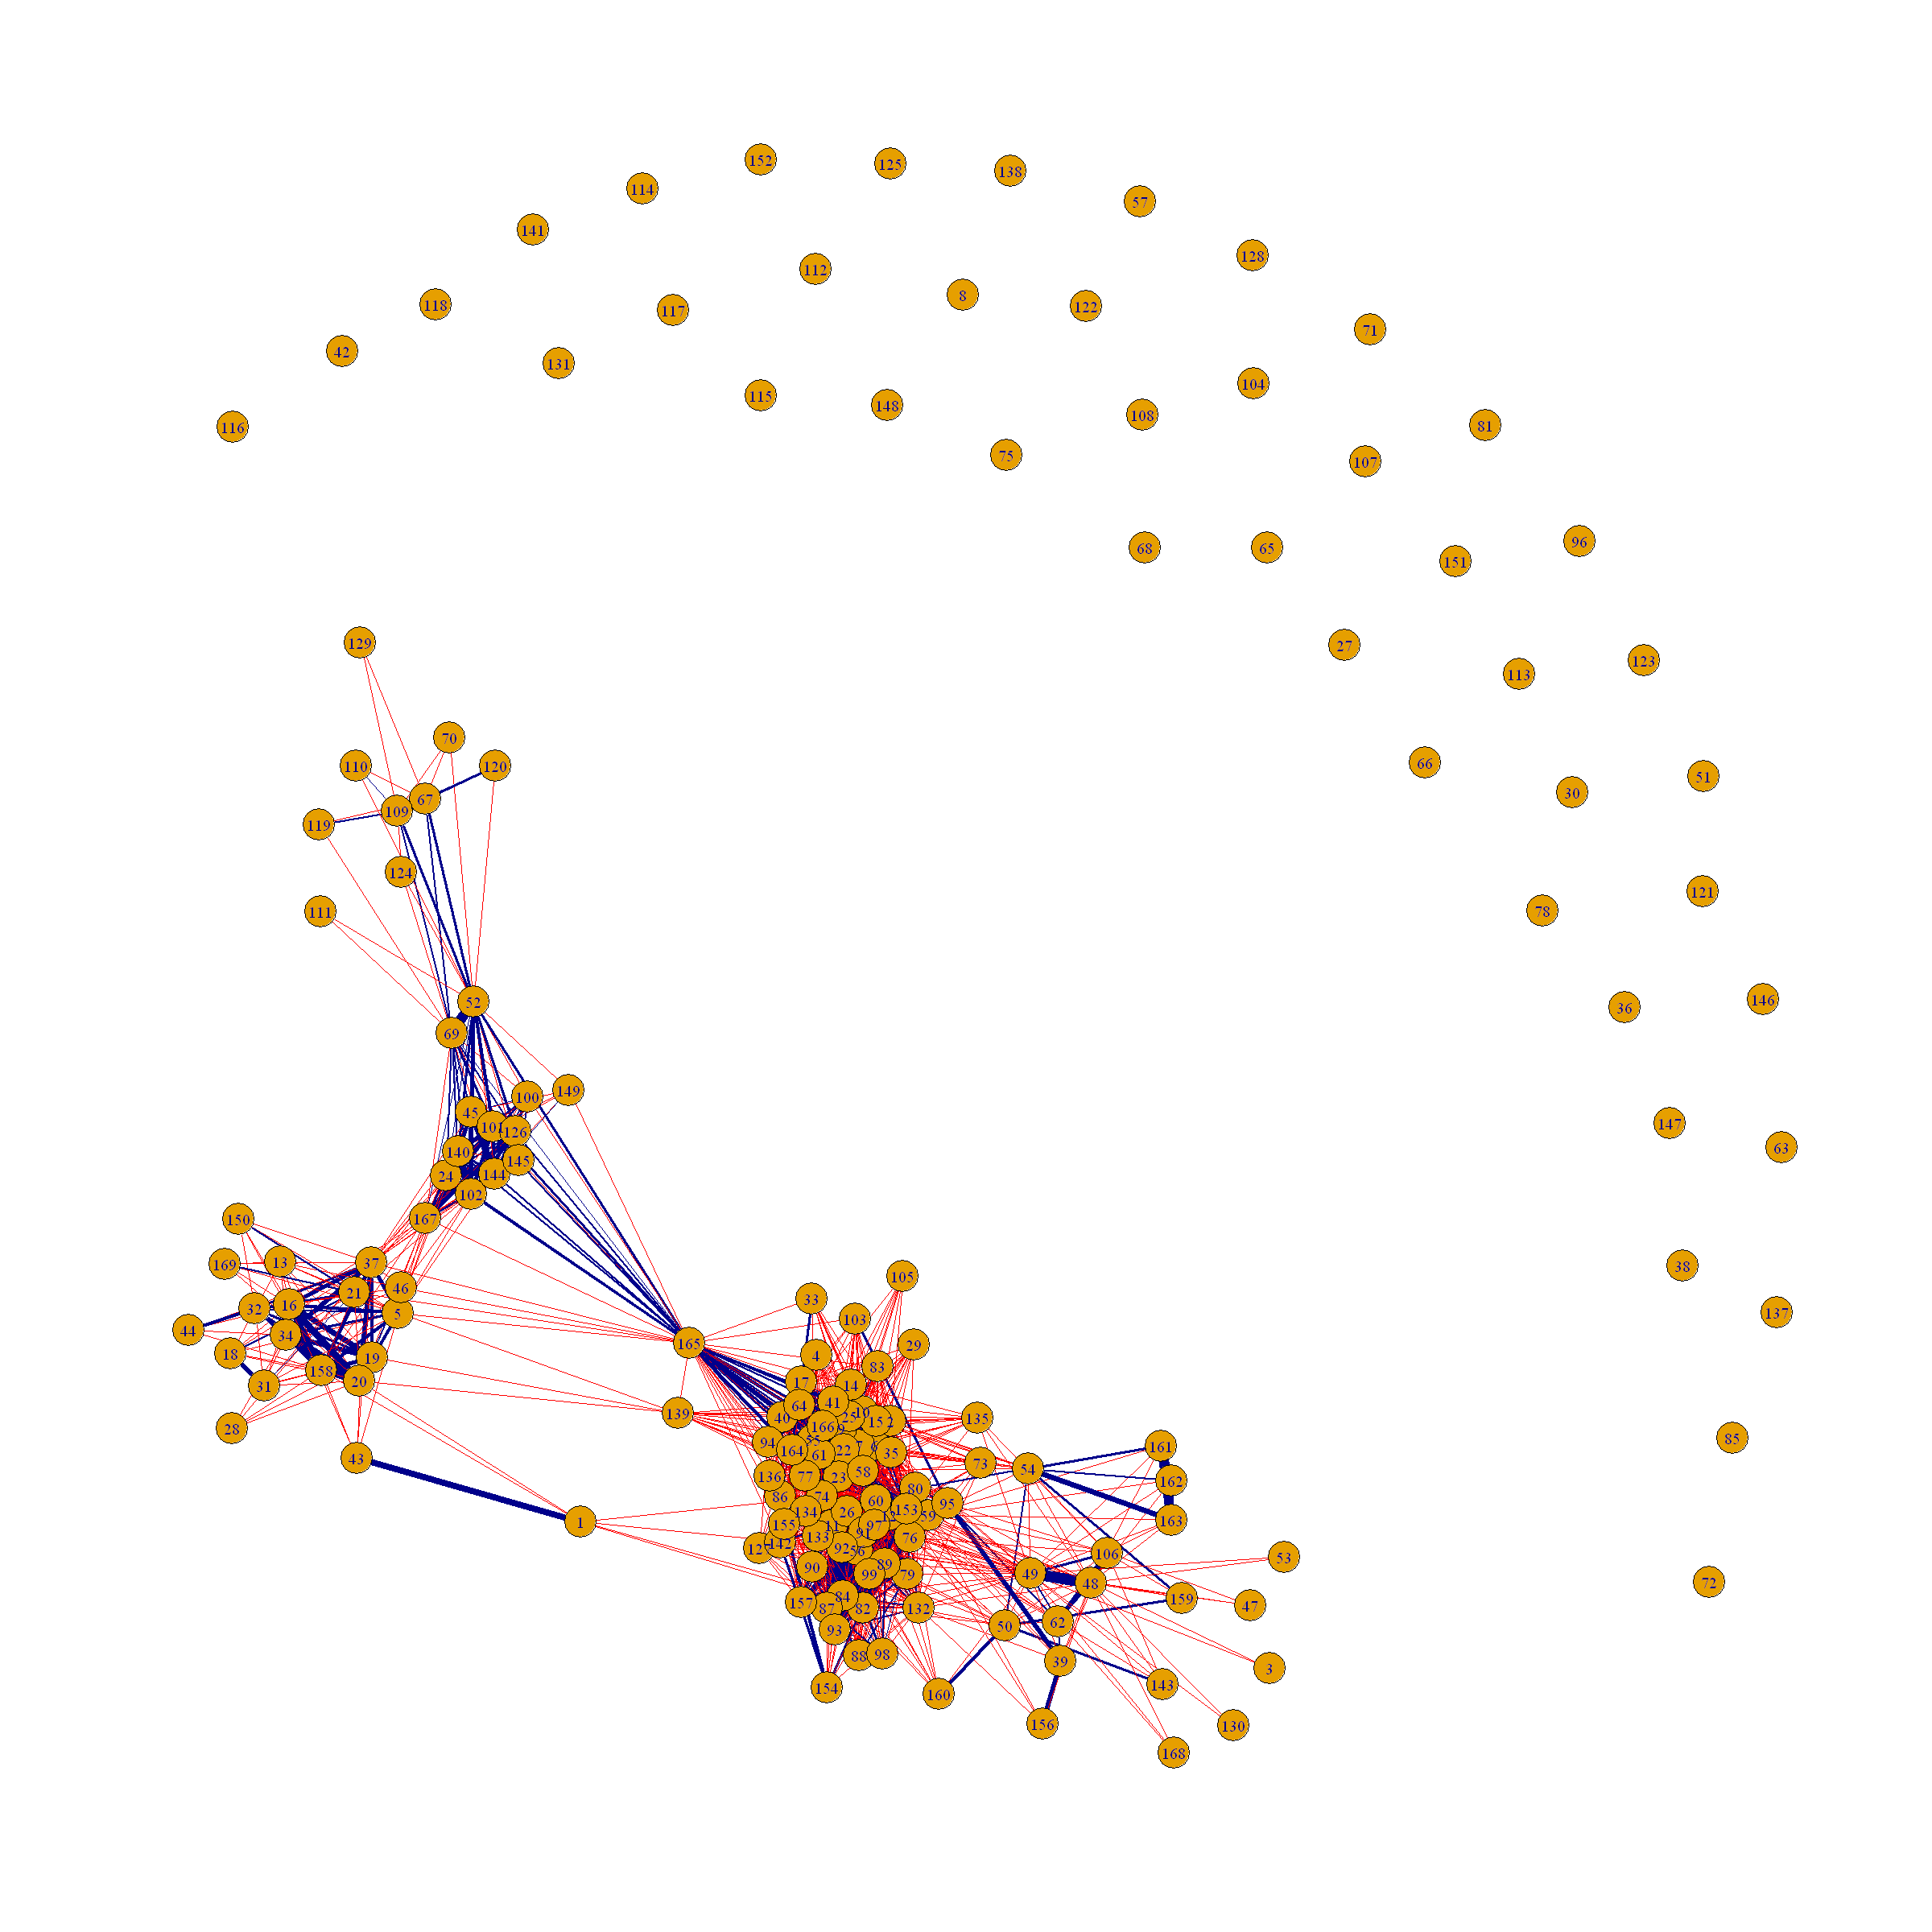

In [184]:
#Now we set the edge attributes of birds that interacted on day 3
#Color coding the edges so that according to the halfweight index, we can see which birds interacted the most and least 
birdsgraph_day3 <- birdsgraph_day3 %>%
    set_edge_attr("color", value = 'darkblue', E(birdsgraph_day3)[Halfweight_Index > mean_bird3])%>%
    set_edge_attr("color", value = 'darkgreen', E(birdsgraph_day3)[Halfweight_Index == mean_bird3])%>%
    set_edge_attr("color", value = 'red', E(birdsgraph_day3)[Halfweight_Index < mean_bird3])

#Plotting the netword for day 3
options(repr.plot.height = 20, repr.plot.width = 20)
plot(birdsgraph_day3, layout=layout_with_fr, vertex.size= 4, vertex.label.size = 4, edge.width = E(birdsgraph_day3)$Halfweight_Index*20)



##### The number of connected components of day 3 graph is 44, which means the graph is disconnected

In [177]:
#checking number of connected components in day 3 network
ConnectedComp <- components(birdsgraph_day3)
ConnectedComp$no

[1] 44

In [206]:
#The number of vertices and edges
print(paste0("the number of vertices in day 3 graph are:", gorder(birdsgraph_day3)))
print(paste0("the number of edges in day 3 graph are:", gsize(birdsgraph_day3)))

#Calculating the average path length of birds on day 3 graph
print(paste("The average path length of birds interaction on day 3 is: ", average.path.length(birdsgraph_day3)))

#Calculating the max, min, and average degree
print(paste("The vertex with the maximum degree on day 3 is: ", max(degree(birdsgraph_day3))))
print(paste("The vertex with the minimum degree on day 3 is: ", min(degree(birdsgraph_day3))))
print(paste("The average vertex degree on day 3 is: ", mean(degree(birdsgraph_day3))))

#Finding the bird which has the max degree on day 3 
#Since the graph is disconnected for day 3, we have multiple vertices for lowest degree 
print(paste("The bird with the highest degree on day 3 is: ", V(birdsgraph_day3)[degree(birdsgraph_day3) == max(degree(birdsgraph_day3))]))


#Closeness centrality
print(paste("the closeness centrality of most interactive bird number 58 on day 3 is ", closeness(birdsgraph_day3, "58")))

#Calculating the betweenness centrality of birds with max and min degree
print(paste("the betweenness centrality of most interactive bird number 58 on day 3 is ", betweenness(birdsgraph_day3, "58")))

#Finding the neighbors of vertex with highest and lowest degree
neighbors(birdsgraph_day3, '58', mode = c("out", "in", "all", "total"))

#clustering coeff
print(paste("The clustering coefficient of day 3 graph is: ", transitivity(birdsgraph_day3)))
print(paste("The average clustering coefficient of day 3 graph is: ", transitivity(birdsgraph_day3, type = "average")))

print(paste("The diameter (largest shortest path) of day 3 graph is:", diameter(birdsgraph_day3, directed = FALSE, unconnected = TRUE)))

[1] "the number of vertices in day 3 graph are:169"
[1] "the number of edges in day 3 graph are:1615"
[1] "The average path length of birds interaction on day 3 is:  2.38298412698413"
[1] "The vertex with the maximum degree on day 3 is:  58"
[1] "The vertex with the minimum degree on day 3 is:  0"
[1] "The average vertex degree on day 3 is:  19.112426035503"
[1] "The bird with the highest degree on day 3 is:  58"


Warning message in closeness(birdsgraph_day3, "58"):
"At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs"

[1] "the closeness centrality of most interactive bird number 58 on day 3 is  0.000133671968988103"
[1] "the betweenness centrality of most interactive bird number 58 on day 3 is  139.167486626663"


+ 58/169 vertices, from 5d1a721:
 [1]   2   4   6   7   9  10  11  12  14  15  17  22  23  25  26  29  33  35  40
[20]  41  49  54  55  56  59  60  61  64  74  76  77  79  80  82  83  84  86  89
[39]  90  91  92  94  95  97  99 103 127 132 133 135 136 139 142 153 155 164 165
[58] 166

[1] "The clustering coefficient of day 3 graph is:  0.682027649769585"
[1] "The average clustering coefficient of day 3 graph is:  0.7682376111775"
[1] "The diameter (largest shortest path) of day 3 graph is: 6"


## Plotting and calculating graph metrics for birds interaction on day 4

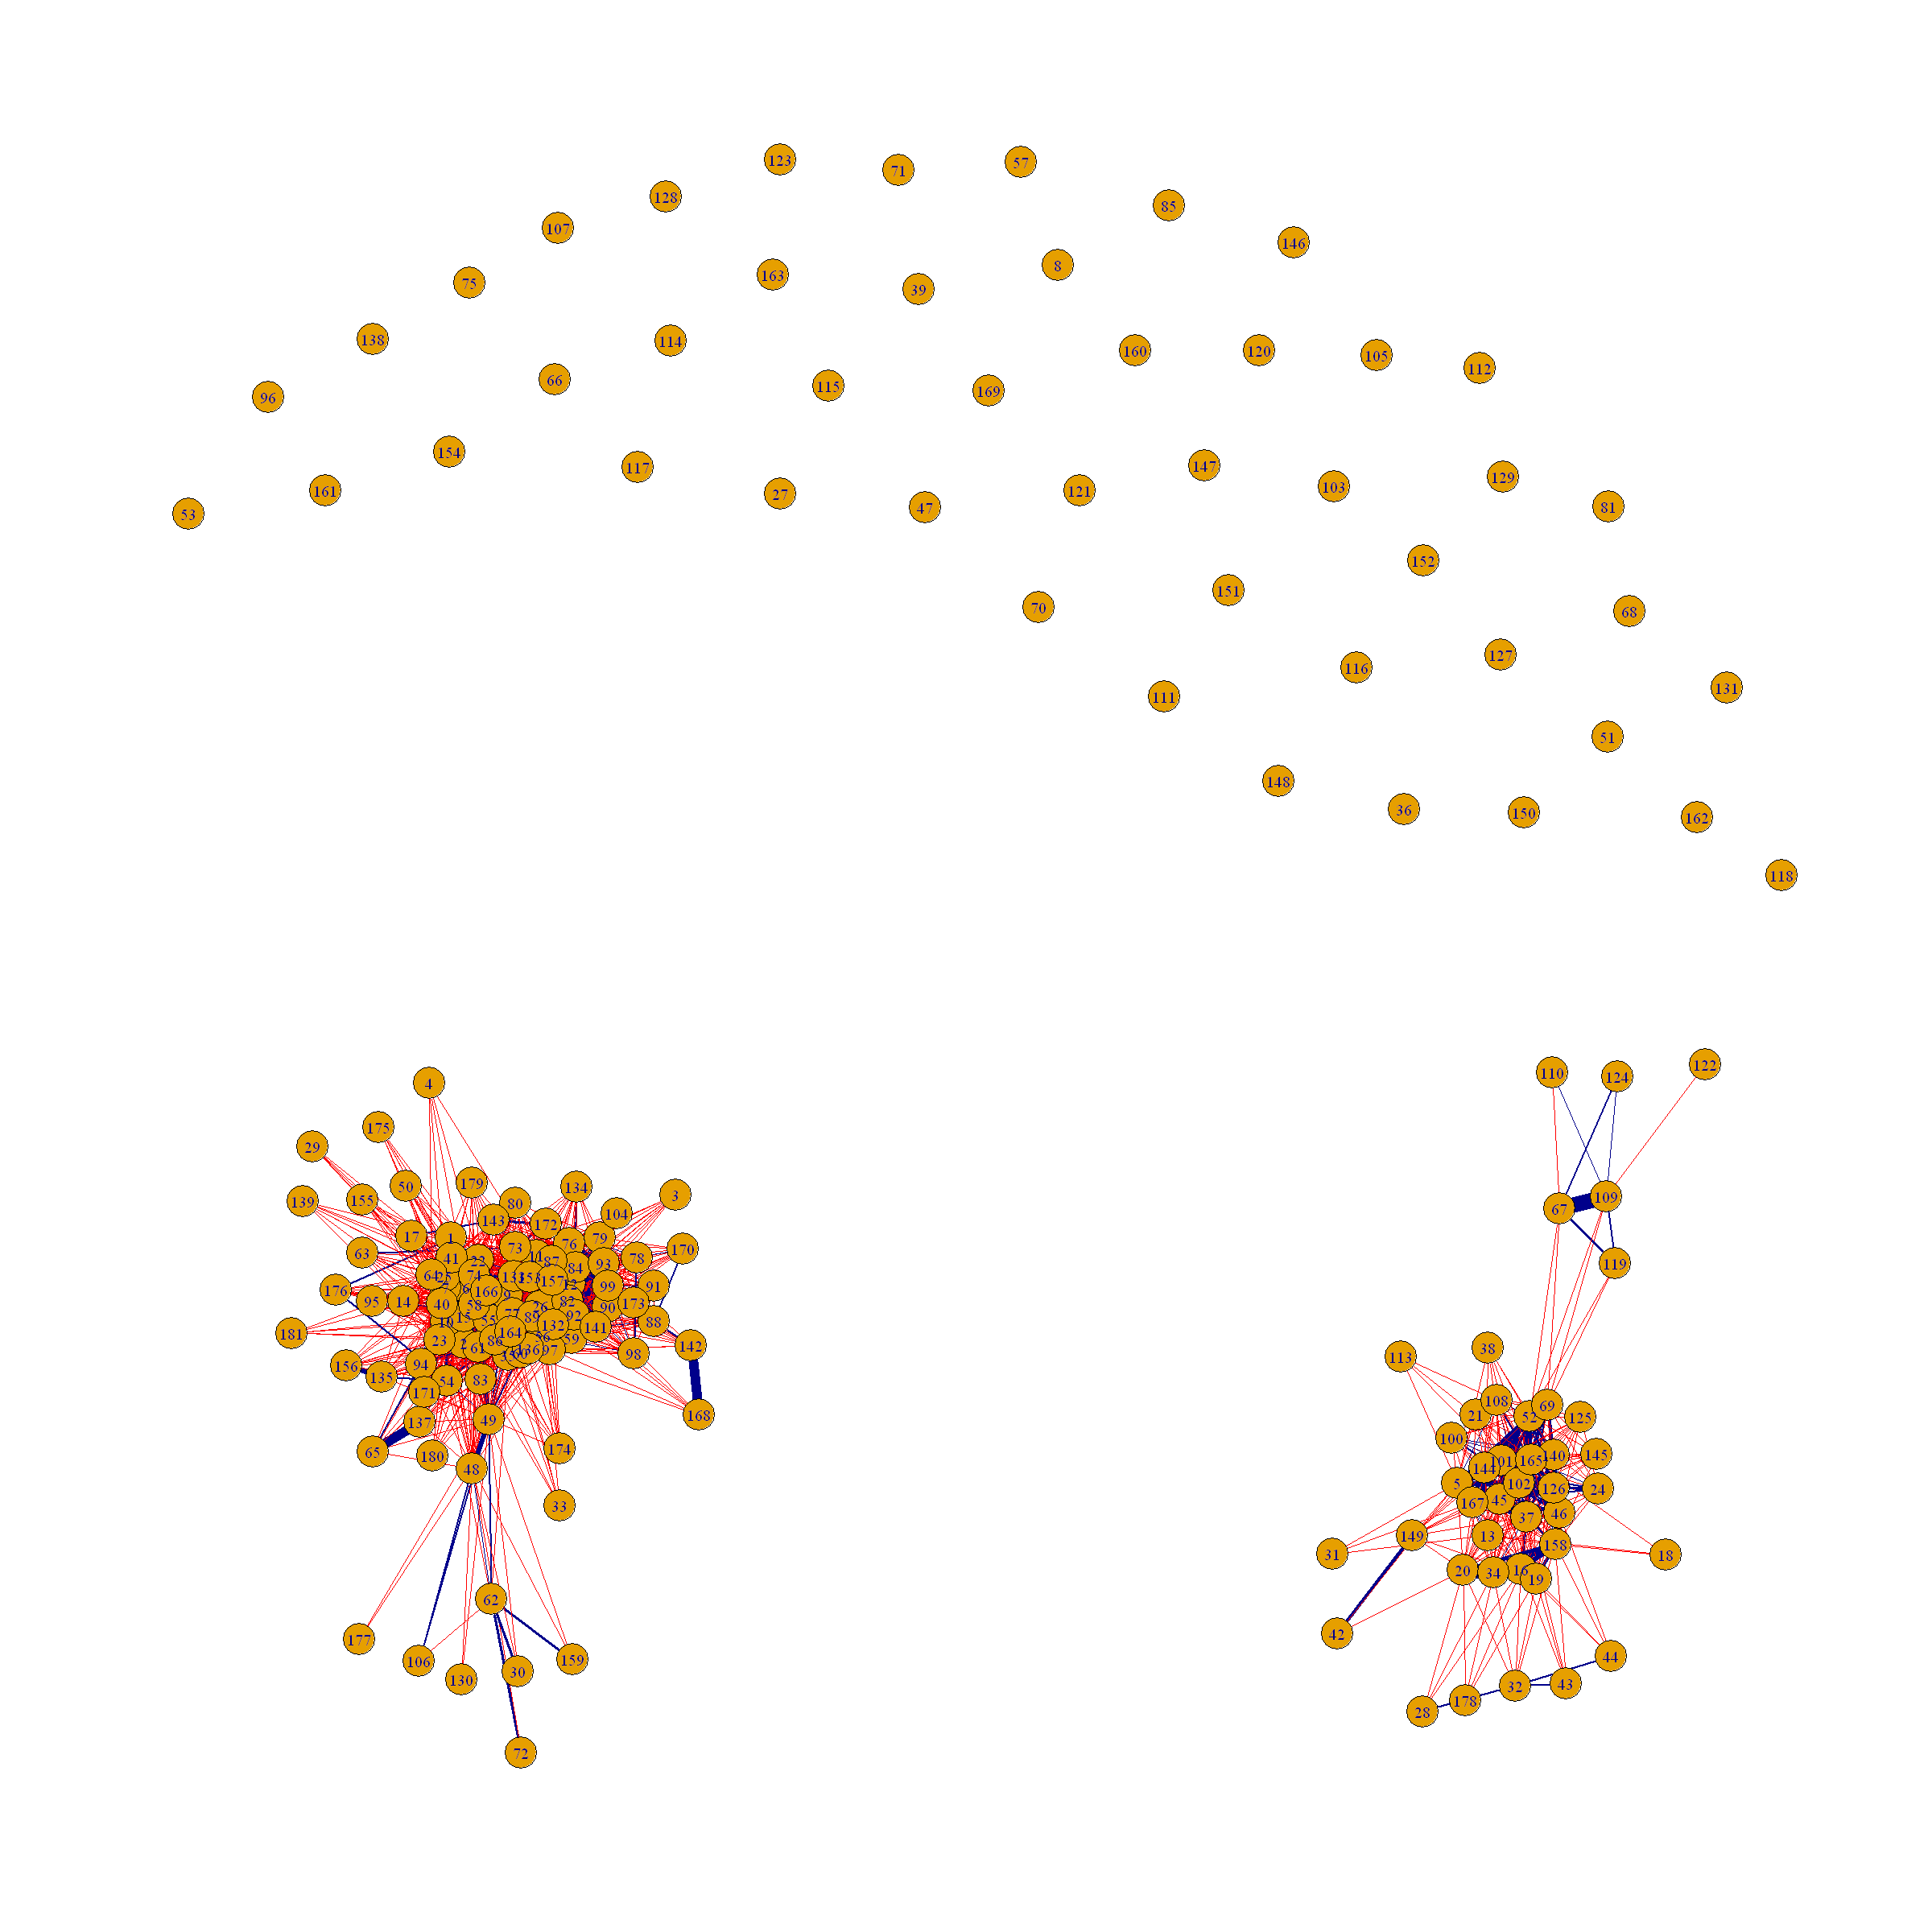

In [185]:
#Now we set the edge attributes of birds that interacted on day 4
#Color coding the edges so that according to the halfweight index, we can see which birds interacted the most and least 
birdsgraph_day4 <- birdsgraph_day4 %>%
    set_edge_attr("color", value = 'darkblue', E(birdsgraph_day4)[Halfweight_Index > mean_bird4])%>%
    set_edge_attr("color", value = 'darkgreen', E(birdsgraph_day4)[Halfweight_Index == mean_bird4])%>%
    set_edge_attr("color", value = 'red', E(birdsgraph_day4)[Halfweight_Index < mean_bird4])

#Plotting the netword for day 4
options(repr.plot.height = 20, repr.plot.width = 20)
plot(birdsgraph_day4, layout=layout_with_fr, vertex.size= 4, vertex.label.size = 4, edge.width = E(birdsgraph_day4)$Halfweight_Index*20)



##### The number of connected components of day 4 graph is 48, which means the graph is disconnected

In [178]:
#checking number of connected components in day 4 network
ConnectedComp <- components(birdsgraph_day4)
ConnectedComp$no

[1] 48

In [207]:
#The number of vertices and edges
print(paste0("the number of vertices in day 4 graph are:", gorder(birdsgraph_day4)))
print(paste0("the number of edges in day 4 graph are:", gsize(birdsgraph_day4)))


#Calculating the average path length of birds on day 4 graph
print(paste("The average path length of birds interaction on day 4 is: ", average.path.length(birdsgraph_day4)))

#Calculating the max, min, and average degree
print(paste("The vertex with the maximum degree on day 4 is: ", max(degree(birdsgraph_day4))))
print(paste("The vertex with the minimum degree on day 4 is: ", min(degree(birdsgraph_day4))))
print(paste("The average vertex degree on day 3 is: ", mean(degree(birdsgraph_day4))))

#Finding the bird which has the max degree on day 4 
#Since the graph is disconnected for day 3, we have multiple vertices for lowest degree 
print(paste("The bird with the highest degree on day 4 is: ", V(birdsgraph_day4)[degree(birdsgraph_day4) == max(degree(birdsgraph_day4))]))


#Closeness centrality
print(paste("the closeness centrality of most interactive bird number 6 on day 4 is ", closeness(birdsgraph_day4, "6")))

#Calculating the betweenness centrality of birds with max and min degree
print(paste("the betweenness centrality of most interactive bird number 6 on day 4 is ", betweenness(birdsgraph_day4, "6")))

#Finding the neighbors of vertex with highest and lowest degree
neighbors(birdsgraph_day4, '6', mode = c("out", "in", "all", "total"))

#clustering coeff
print(paste("The clustering coefficient of day 4 graph is: ", transitivity(birdsgraph_day4)))
print(paste("The average clustering coefficient of day 4 graph is: ", transitivity(birdsgraph_day4, type = "average")))

print(paste("The diameter (largest shortest path) of day 4 graph is:", diameter(birdsgraph_day4, directed = FALSE, unconnected = TRUE)))

[1] "the number of vertices in day 4 graph are:181"
[1] "the number of edges in day 4 graph are:2009"
[1] "The average path length of birds interaction on day 4 is:  1.71006032302004"
[1] "The vertex with the maximum degree on day 4 is:  71"
[1] "The vertex with the minimum degree on day 4 is:  0"
[1] "The average vertex degree on day 3 is:  22.1988950276243"
[1] "The bird with the highest degree on day 4 is:  6"


Warning message in closeness(birdsgraph_day4, "6"):
"At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs"

[1] "the closeness centrality of most interactive bird number 6 on day 4 is  6.23402531014276e-05"
[1] "the betweenness centrality of most interactive bird number 6 on day 4 is  185.849889448805"


+ 71/181 vertices, from 5de47d4:
 [1]   1   2   4   7   9  10  11  12  14  15  17  22  23  25  26  29  35  40  41
[20]  48  49  50  54  55  56  58  59  60  61  64  65  73  74  76  77  79  80  82
[39]  83  84  86  87  89  90  91  92  93  94  95  97  99 132 133 134 135 136 137
[58] 139 143 153 157 164 166 171 172 174 175 176 179 180 181

[1] "The clustering coefficient of day 4 graph is:  0.71845484813481"
[1] "The average clustering coefficient of day 4 graph is:  0.827451940211277"
[1] "The diameter (largest shortest path) of day 4 graph is: 4"


## Plotting and calculating graph metrics for birds interaction on day 5

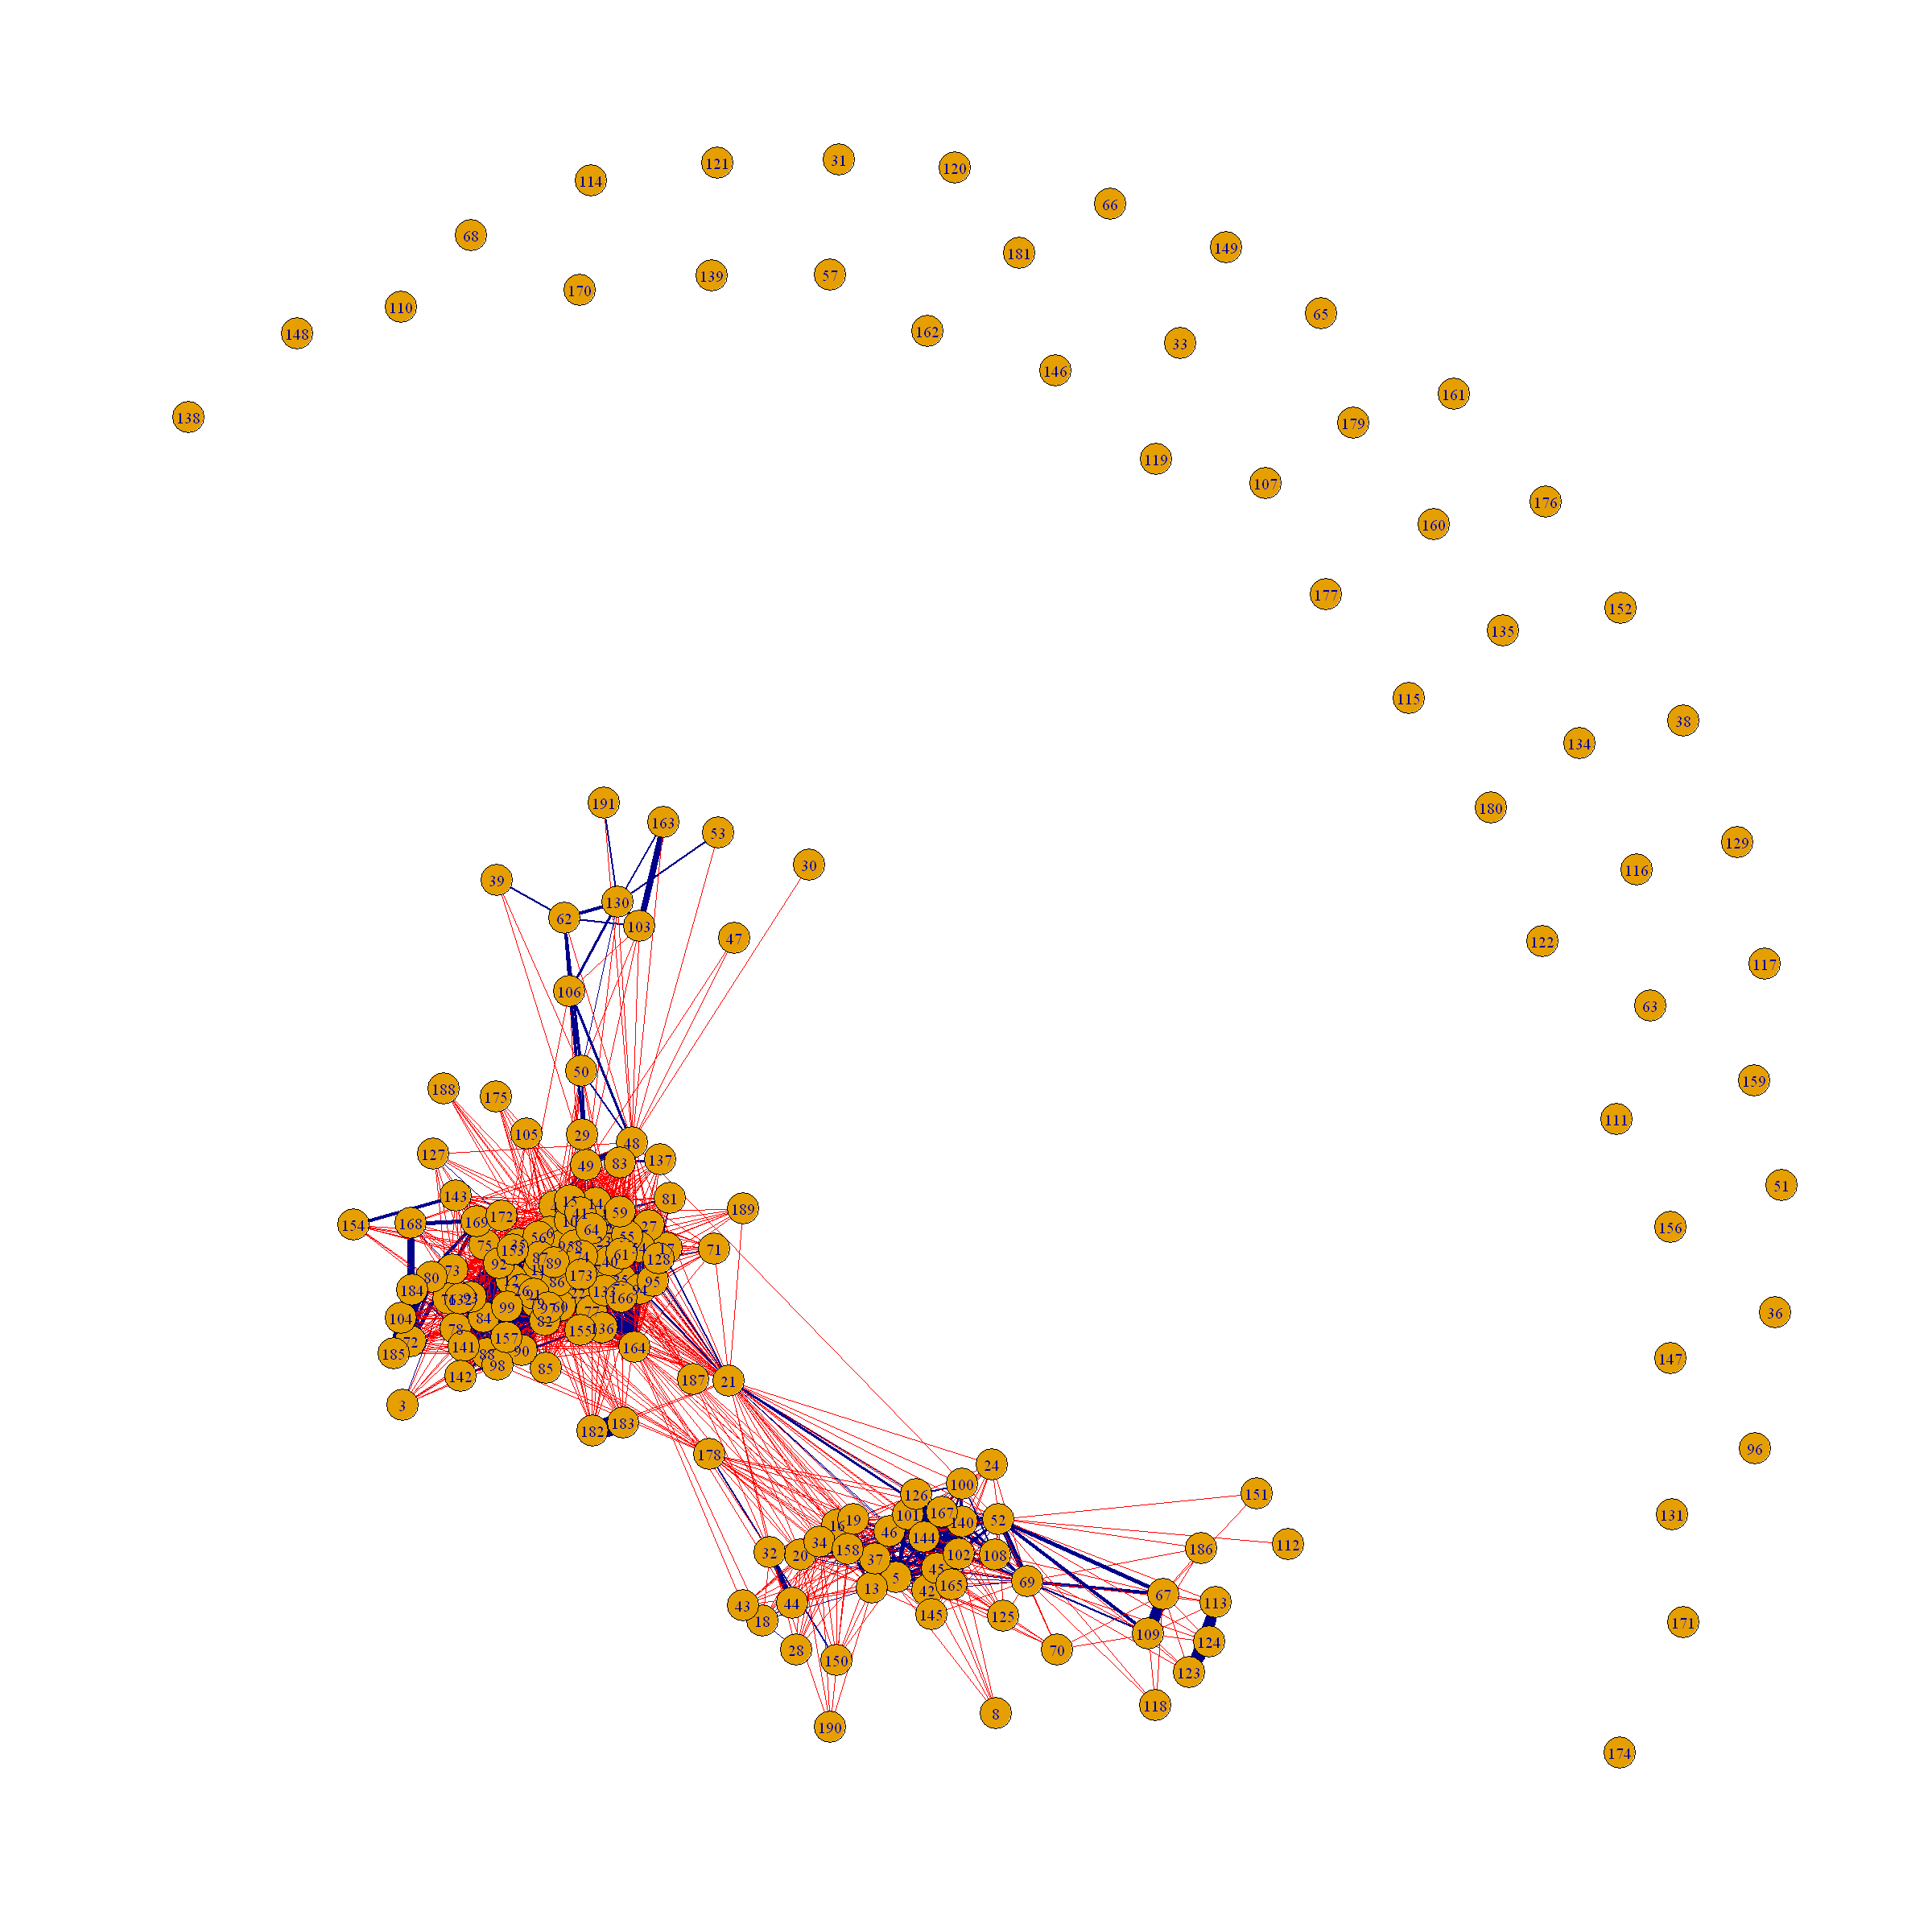

In [186]:
#Now we set the edge attributes of birds that interacted on day 5
#Color coding the edges so that according to the halfweight index, we can see which birds interacted the most and least 
birdsgraph_day5 <- birdsgraph_day5 %>%
    set_edge_attr("color", value = 'darkblue', E(birdsgraph_day5)[Halfweight_Index > mean_bird5])%>%
    set_edge_attr("color", value = 'darkgreen', E(birdsgraph_day5)[Halfweight_Index == mean_bird5])%>%
    set_edge_attr("color", value = 'red', E(birdsgraph_day5)[Halfweight_Index < mean_bird5])

#Plotting the netword for day 5
options(repr.plot.height = 20, repr.plot.width = 20)
plot(birdsgraph_day5, layout=layout_with_fr, vertex.size= 4, vertex.label.size = 4, edge.width = E(birdsgraph_day5)$Halfweight_Index*20)



##### The number of connected components of day 5 graph is 47, which means the graph is disconnected

In [179]:
#checking number of connected components in day 4 network
ConnectedComp <- components(birdsgraph_day5)
ConnectedComp$no

[1] 47

In [208]:
#The number of vertices and edges
print(paste0("the number of vertices in day 5 graph are:", gorder(birdsgraph_day5)))
print(paste0("the number of edges in day 5 graph are:", gsize(birdsgraph_day5)))

#Calculating the average path length of birds on day 5 graph
print(paste("The average path length of birds interaction on day 5 is: ", average.path.length(birdsgraph_day5)))

#Calculating the max, min, and average degree
print(paste("The vertex with the maximum degree on day 5 is: ", max(degree(birdsgraph_day5))))
print(paste("The vertex with the minimum degree on day 5 is: ", min(degree(birdsgraph_day5))))
print(paste("The average vertex degree on day 5 is: ", mean(degree(birdsgraph_day5))))

#Finding the bird which has the max degree on day 5 
#Since the graph is disconnected for day 5, we have multiple vertices for lowest degree 
print(paste("The bird with the highest degree on day 5 is: ", V(birdsgraph_day5)[degree(birdsgraph_day5) == max(degree(birdsgraph_day5))]))


#Closeness centrality
print(paste("the closeness centrality of most interactive bird number 86 on day 5 is ", closeness(birdsgraph_day5, "86")))
print(paste("the closeness centrality of most interactive bird number 6 on day 5 is ", closeness(birdsgraph_day5, "6")))


#Calculating the betweenness centrality of birds with max and min degree
print(paste("the betweenness centrality of most interactive bird number 86 on day 5 is ", betweenness(birdsgraph_day5, "86")))
print(paste("the betweenness centrality of most interactive bird number 6 on day 5 is ", betweenness(birdsgraph_day5, "6")))

#Finding the neighbors of vertex with highest and lowest degree
neighbors(birdsgraph_day5, '86', mode = c("out", "in", "all", "total"))

#clustering coeff
print(paste("The clustering coefficient of day 5 graph is: ", transitivity(birdsgraph_day5)))
print(paste("The average clustering coefficient of day 5 graph is: ", transitivity(birdsgraph_day5, type = "average")))

print(paste("The diameter (largest shortest path) of day 5 graph is:", diameter(birdsgraph_day5, directed = FALSE, unconnected = TRUE)))

[1] "the number of vertices in day 5 graph are:191"
[1] "the number of edges in day 5 graph are:2512"
[1] "The average path length of birds interaction on day 5 is:  2.09243295019157"
[1] "The vertex with the maximum degree on day 5 is:  78"
[1] "The vertex with the minimum degree on day 5 is:  0"
[1] "The average vertex degree on day 5 is:  26.303664921466"
[1] "The bird with the highest degree on day 5 is:  6" 
[2] "The bird with the highest degree on day 5 is:  86"


Warning message in closeness(birdsgraph_day5, "86"):
"At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs"

[1] "the closeness centrality of most interactive bird number 86 on day 5 is  0.000110975474420153"


Warning message in closeness(birdsgraph_day5, "6"):
"At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs"

[1] "the closeness centrality of most interactive bird number 6 on day 5 is  0.000110975474420153"
[1] "the betweenness centrality of most interactive bird number 86 on day 5 is  198.768487136226"
[1] "the betweenness centrality of most interactive bird number 6 on day 5 is  168.189090611097"


+ 78/191 vertices, from 5e8d67d:
 [1]   1   2   4   6   7   9  10  11  12  14  15  17  21  22  23  25  26  27  35
[20]  40  41  48  49  50  54  55  56  58  59  60  61  64  72  73  74  76  77  78
[39]  79  80  81  82  83  84  87  88  89  90  91  92  93  94  95  97  98  99 104
[58] 128 132 133 136 137 141 142 153 155 157 164 166 172 173 175 182 183 184 185
[77] 187 189

[1] "The clustering coefficient of day 5 graph is:  0.711056258859182"
[1] "The average clustering coefficient of day 5 graph is:  0.79624976337726"
[1] "The diameter (largest shortest path) of day 5 graph is: 4"


## Plotting and calculating graph metrics for birds interaction on day 6

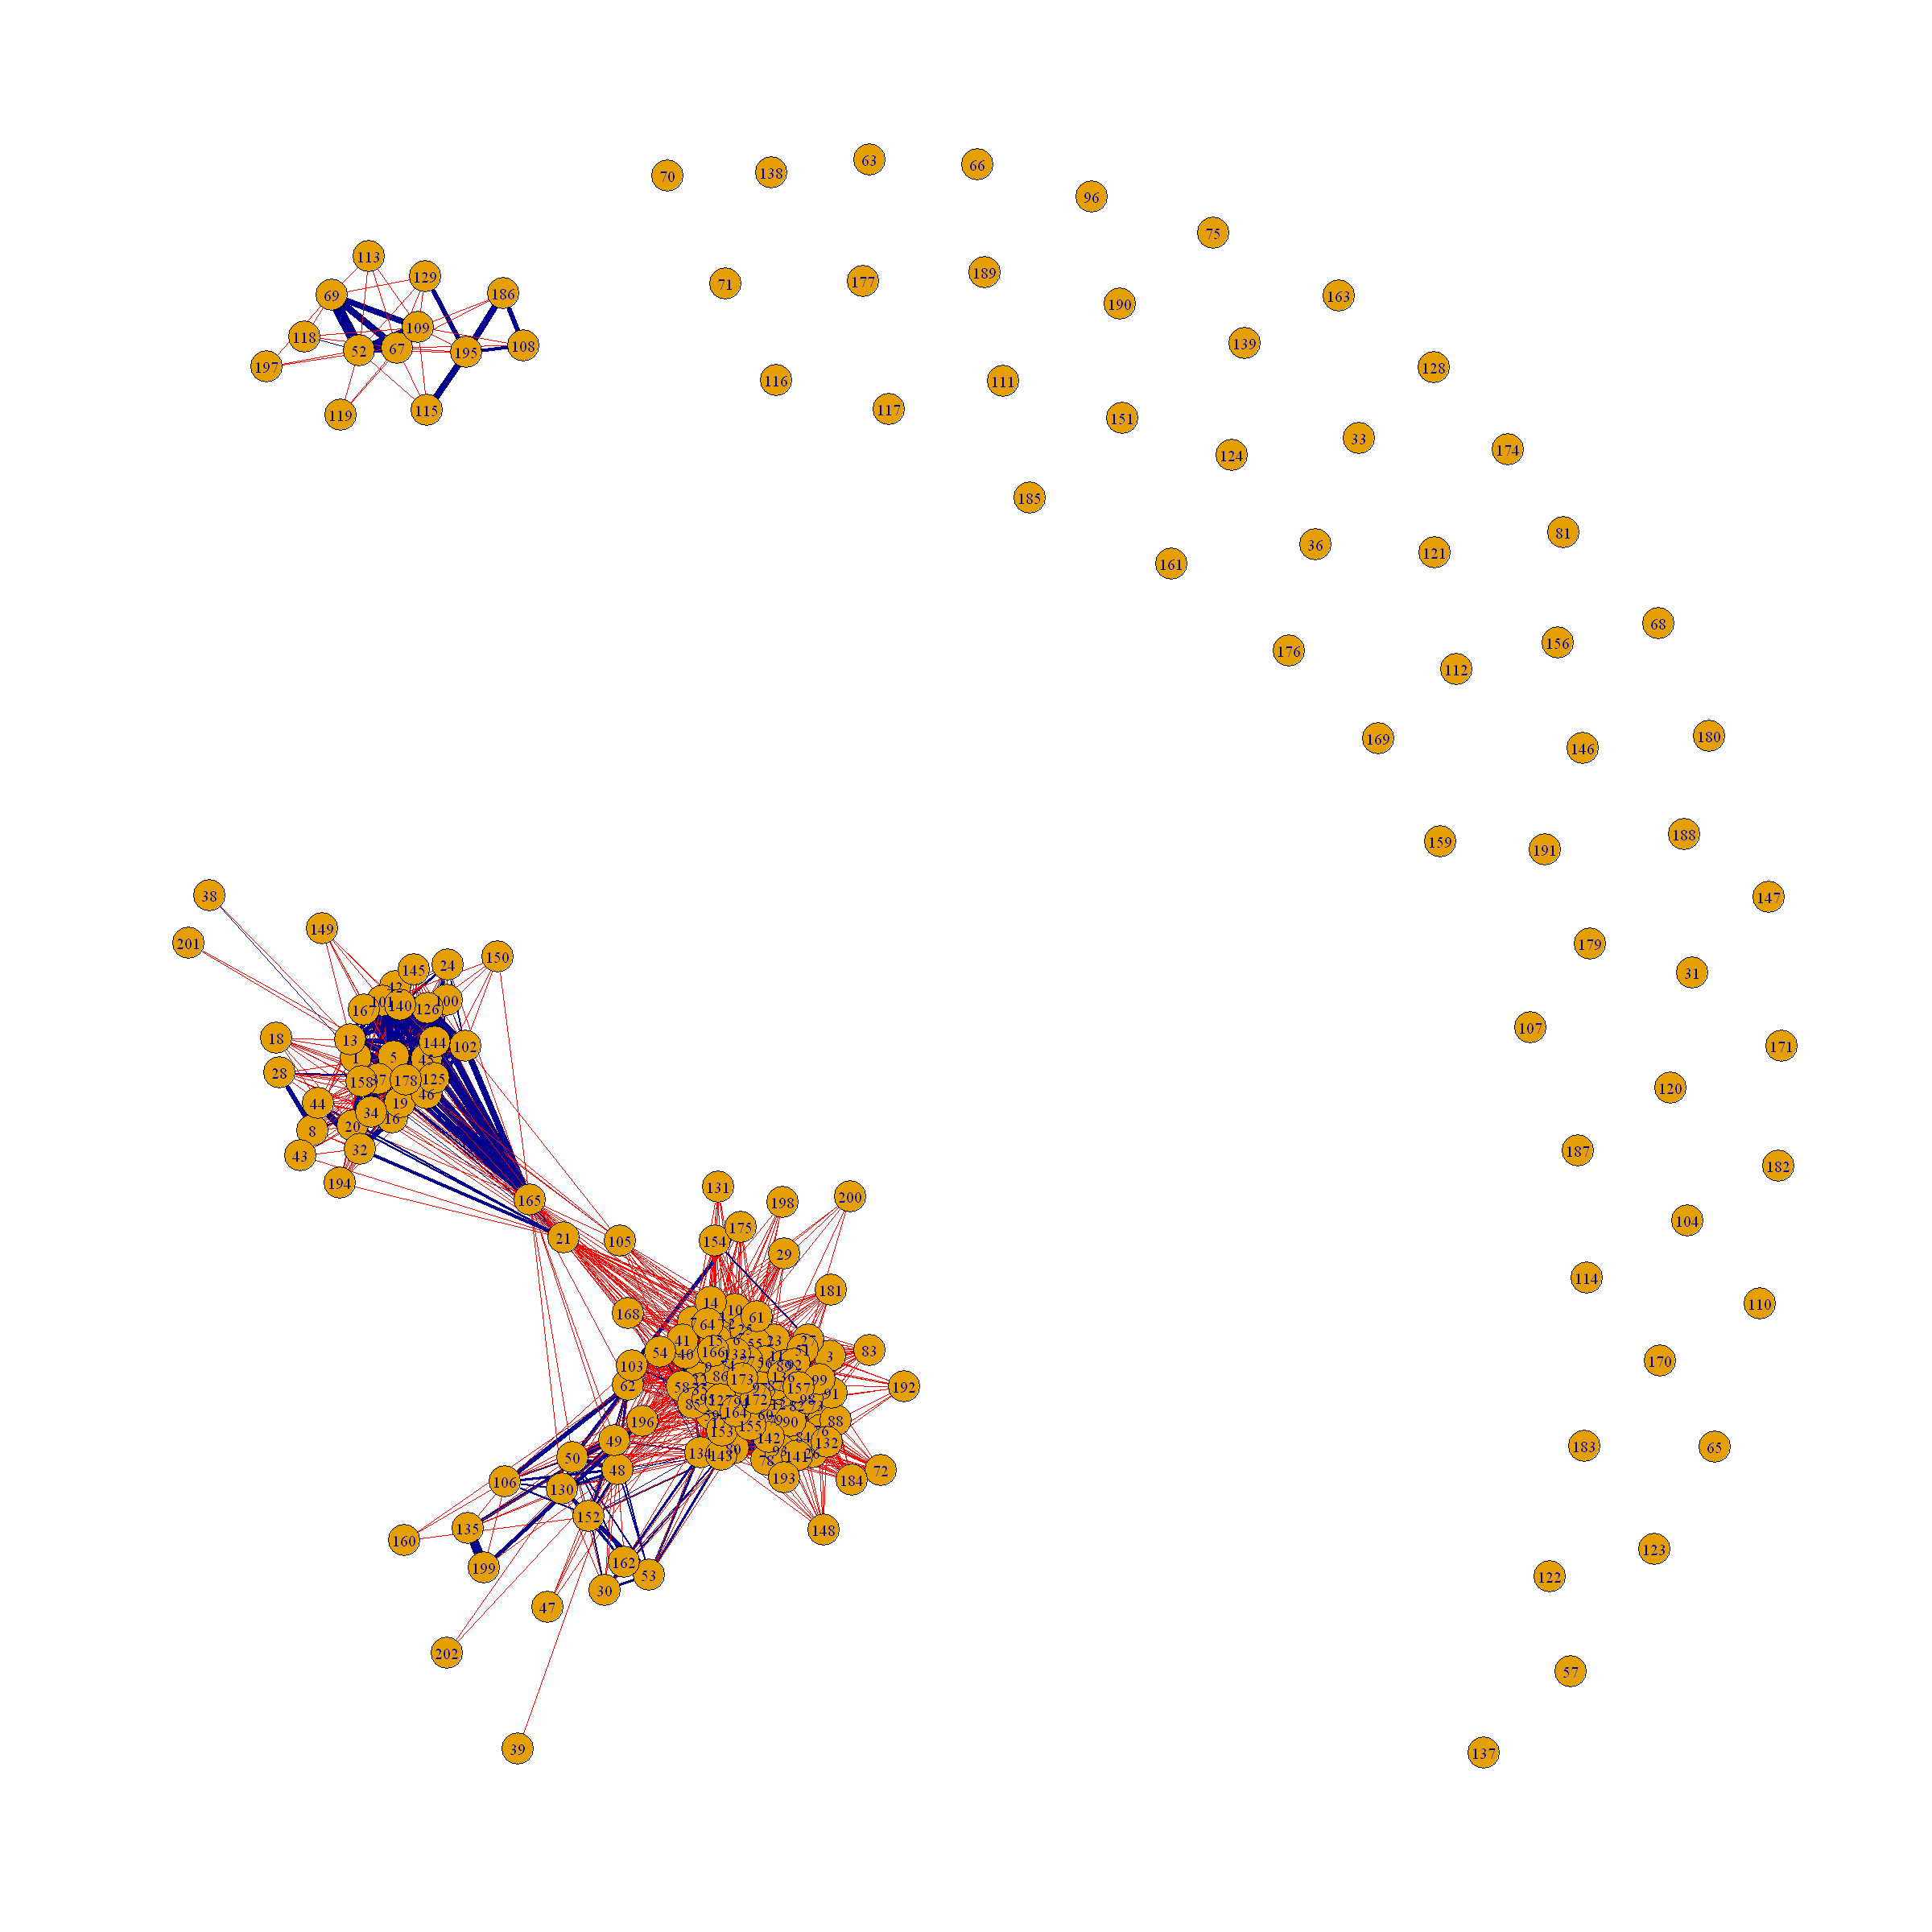

In [187]:
#Now we set the edge attributes of birds that interacted on day 6
#Color coding the edges so that according to the halfweight index, we can see which birds interacted the most and least 
birdsgraph_day6 <- birdsgraph_day6 %>%
    set_edge_attr("color", value = 'darkblue', E(birdsgraph_day6)[Halfweight_Index > mean_bird6])%>%
    set_edge_attr("color", value = 'darkgreen', E(birdsgraph_day6)[Halfweight_Index == mean_bird6])%>%
    set_edge_attr("color", value = 'red', E(birdsgraph_day6)[Halfweight_Index < mean_bird6])

#Plotting the netword for day 6
options(repr.plot.height = 20, repr.plot.width = 20)
plot(birdsgraph_day6, layout=layout_with_fr, vertex.size= 4, vertex.label.size = 4, edge.width = E(birdsgraph_day6)$Halfweight_Index*20)


##### The number of connected components of day 6 graph is 55, which means the graph is disconnected

In [181]:
#checking number of connected components in day 4 network
ConnectedComp <- components(birdsgraph_day6)
ConnectedComp$no

[1] 55

In [209]:
#The number of vertices and edges
print(paste0("the number of vertices in day 6 graph are:", gorder(birdsgraph_day6)))
print(paste0("the number of edges in day 6 graph are:", gsize(birdsgraph_day6)))

#Calculating the average path length of birds on day 6 graph
print(paste("The average path length of birds interaction on day 6 is: ", average.path.length(birdsgraph_day6)))

#Calculating the max, min, and average degree
print(paste("The vertex with the maximum degree on day 6 is: ", max(degree(birdsgraph_day6))))
print(paste("The vertex with the minimum degree on day 6 is: ", min(degree(birdsgraph_day6))))
print(paste("The average vertex degree on day 6 is: ", mean(degree(birdsgraph_day6))))

#Finding the bird which has the max degree on day 6 
#Since the graph is disconnected for day 6, we have multiple vertices for lowest degree 
print(paste("The bird with the highest degree on day 6 is: ", V(birdsgraph_day6)[degree(birdsgraph_day6) == max(degree(birdsgraph_day6))]))


#Closeness centrality
print(paste("the closeness centrality of most interactive bird number 6 on day 6 is ", closeness(birdsgraph_day6, "6")))

#Calculating the betweenness centrality of birds with max and min degree
print(paste("the betweenness centrality of most interactive bird number 6 on day 6 is ", betweenness(birdsgraph_day6, "6")))

#Finding the neighbors of vertex with highest and lowest degree
neighbors(birdsgraph_day6, '6', mode = c("out", "in", "all", "total"))

#clustering coeff
print(paste("The clustering coefficient of day 6 graph is: ", transitivity(birdsgraph_day6)))
print(paste("The average clustering coefficient of day 6 graph is: ", transitivity(birdsgraph_day6, type = "average")))

print(paste("The diameter (largest shortest path) of day 6 graph is:", diameter(birdsgraph_day6, directed = FALSE, unconnected = TRUE)))

[1] "the number of vertices in day 6 graph are:202"
[1] "the number of edges in day 6 graph are:2837"
[1] "The average path length of birds interaction on day 6 is:  2.03726506804925"
[1] "The vertex with the maximum degree on day 6 is:  81"
[1] "The vertex with the minimum degree on day 6 is:  0"
[1] "The average vertex degree on day 6 is:  28.0891089108911"
[1] "The bird with the highest degree on day 6 is:  6"


Warning message in closeness(birdsgraph_day6, "6"):
"At centrality.c:2784 :closeness centrality is not well-defined for disconnected graphs"

[1] "the closeness centrality of most interactive bird number 6 on day 6 is  7.39207569485512e-05"
[1] "the betweenness centrality of most interactive bird number 6 on day 6 is  237.182959067067"


+ 81/202 vertices, from 5f6338b:
 [1]   2   3   4   7   9  10  11  12  14  15  17  21  22  23  25  26  27  29  35
[20]  40  41  49  51  54  55  56  58  59  60  61  62  64  73  74  76  77  78  79
[39]  80  82  83  84  85  86  87  88  89  90  91  92  93  94  95  97  98  99 103
[58] 105 127 131 132 133 134 136 141 142 143 153 154 155 157 164 165 166 168 172
[77] 173 175 181 196 200

[1] "The clustering coefficient of day 6 graph is:  0.767027990054362"
[1] "The average clustering coefficient of day 6 graph is:  0.811554962892565"
[1] "The diameter (largest shortest path) of day 6 graph is: 4"


#### The histogram showing the frequency of interaction of birds on each day was done in Rstudio since the package ggplot did not work in jupyter notebook for some reason. The plot will be shown in the report

In [ ]:
install.packages("tidyverse")

In [172]:
library(ggplot2)

ERROR: Error in library(ggplot2): there is no package called 'ggplot2'


In [169]:
ggplot(wildbirds_data, aes(x=wildbirds_data$V4)) + 
  geom_histogram(aes(y=..density..), colour="black", fill="lightblue")+
  geom_density(alpha=.2, fill="#FF6666") 

ERROR: Error in ggplot(wildbirds_data, aes(x = wildbirds_data$V4)): could not find function "ggplot"


In [218]:
ggplot(wildbirds_data, aes(x=wildbirds_data$V3)) + 
  geom_histogram(aes(y=..density..), colour="black", fill="lightblue")+
  geom_density(alpha=.2, fill="#FF6666")+
  xlim(0,0.4)

ERROR: Error in ggplot(wildbirds_data, aes(x = wildbirds_data$V3)): could not find function "ggplot"
